# Musical Ambiguous Figures_Data Cleaning & Prep

**Author:** Sarah Gates

**Contact:** sarahgates22@gmail.com

[Github](https://github.com/Saz2049) <br>
[LinkedIn](https://www.linkedin.com/in/sarah-gates-/)

**Date:** Summer 2022

## Introduction

Welcome! 

This notebook includes the preliminary cleaning, aggregating and feature engineering for my musical ambiguous figures project. The first section includes basic data cleaning and examination, and conversion of data types to float. I then clean the biographical data, create expertise designations, and aggregate block orderings from the experiment. Lastly, I combine all of the data into a single aggregated dataframe, create long format versions of each dependent variable (and combined), and create a multi0index frame of the aggregated data. These are then saved to .csv format. 

## Table of Contents

1. [Data Cleaning](#1.-Data-Cleaning)
    * [a. Dropping Incomplete / Unneeded](#a.-Dropping-Incomplete-/-Unneeded)
    * [b. Converting Datatypes to Float](#b.-Converting-Datatypes-to-Float) 
    * [c. Aggregating Columns](#c.-Aggregating-Columns)
    * [d. Bio Data, Expertise Designations, and Order Cleaning](#d.-Bio-Data,-Expertise-Designations-and-Order-Cleaning)
        * [i. Bio Data Cleaning](#i.-Bio-Data-Cleaning)
        * [ii. Expertise Designations](#ii.-Expertise-Designations)
        * [iii. Aggregating Block Orders](#iii.-Aggregating-Block-Orders)
    * [e. Final Dataframe Aggregation and Pre-Processing](#e.-Final-Dataframe-Aggregation-and-Pre-Processing) 
        * [i. Aggregate all (data + bio + order)](#i.-Aggregate-All-(data-+-bio-+-order))
        * [ii. Long-Format Dataframe: DV1](#ii.-Long-Format:-DV1)
        * [iii. Long-Format Dataframe: DV2](#iii.-Long-Format:-DV2-(Ease-of-Change))
        * [iv. Long-Format Dataframe: DV1 and DV2 Combined](#iv.-Long-Format-Dataframe:-DV1-and-DV2)
    * [f. Multi-Index Frames](#f.-Multi-Index-Frames)
    * [g. Creating Excerpt Familiarity Designations](#g.-Creating-Excerpt-Familiarity-Designations)
    
    <br>

2. [Exporting CSV Files](#2.-Exporting-CSV-Files)
    * [a. Removing Outlier and Exporting](#a.-Removing-Outlier-and-Exporting)

Importing the required libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import plotly.express as px
from pylab import rcParams

##  1. Data Cleaning

In this section, I load and examine the data, remove unneeded rows, and aggregate the DV columns. Here, there are many duplicated columns because Qualtrics records the order--therefore, there are two possible order for the Bassline Tonic (1 and 2)--and so there are two versions of these columns. Participants only have one recorded value / DV condition, so the NaNs in these columns result from the fact that the participant did not complete the order listed. 

In [3]:
df = pd.read_csv('data/AmbiguousFigures_anon.csv')

df

,Intro: RABBIT_1,Intro: DUCK_1,Intro: Ease_1,Q143_1,Q146_1,Q145_1,Expo: Bassline Tonic_1,Expo: Bassline Mod _1,Expo: Bassline Ease_2,Expo: Bassline Mod_1,...,Random ID,FL_10_DO,FL_38_DO,FL_7_DO,FL_42_DO,FL_46_DO,FL_57_DO,FL_60_DO,FL_68_DO,FL_72_DO
0,Interpretation A:\n\n \n\nRABBIT\n\n \n\nPleas...,Interpretation B:\n\n \n\nDUCK\n\n \n\nPlease ...,Interpretation A:\n\n \n\nRABBIT\n\n \n\nInter...,Interpretation A:\n\n\n\n\n\n \n\n *note that ...,Interpretation B:\n\n\n\n\n\n *note that the ...,Interpretation A:\n\n \n\n\n\n \n\n \n\nInterp...,Interpretation A:\n\n\n\n\n\nPlease rate the f...,Interpretation B:\n\n\n\n\n \n\nPlease rate th...,Interpretation A:\n\n\n\nInterpretation B:\n\n...,Interpretation A:\n\n\n\n\n \n\nPlease rate th...,...,Random ID,FL_10 - Block Randomizer - Display Order,FL_38 - Block Randomizer - Display Order,FL_7 - Block Randomizer - Display Order,FL_42 - Block Randomizer - Display Order,FL_46 - Block Randomizer - Display Order,FL_57 - Block Randomizer - Display Order,FL_60 - Block Randomizer - Display Order,FL_68 - Block Randomizer - Display Order,FL_72 - Block Randomizer - Display Order
1,"{""ImportId"":""QID133_1""}","{""ImportId"":""QID134_1""}","{""ImportId"":""QID138_1""}","{""ImportId"":""QID192_1""}","{""ImportId"":""QID195_1""}","{""ImportId"":""QID194_1""}","{""ImportId"":""QID1_1""}","{""ImportId"":""QID5_1""}","{""ImportId"":""QID6_2""}","{""ImportId"":""QID45_1""}",...,"{""ImportId"":""Random ID""}","{""ImportId"":""FL_10_DO""}","{""ImportId"":""FL_38_DO""}","{""ImportId"":""FL_7_DO""}","{""ImportId"":""FL_42_DO""}","{""ImportId"":""FL_46_DO""}","{""ImportId"":""FL_57_DO""}","{""ImportId"":""FL_60_DO""}","{""ImportId"":""FL_68_DO""}","{""ImportId"":""FL_72_DO""}"
2,7,7,7,5.6,6.2,6,7,2.9,3,NaN,...,913,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order2)
3,2.1,6.2,4.8,4.8,5.5,4.1,NaN,NaN,NaN,5.4,...,834,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_58|FL_63|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order1)
4,6.1,5.6,6.3,6.8,5.1,4.7,NaN,NaN,NaN,5.9,...,719,FL_35|FL_33,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order1),FL_64|FL_63|FL_58,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1)
5,5,7,4.3,4.6,6.7,3,4.6,5.8,6,NaN,...,862,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order2),Recap:Schema(Order2)
6,7,6.6,6.9,7,7,7,NaN,NaN,NaN,6.2,...,686,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_64|FL_58,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1)
7,7,7,7,7,7,7,NaN,NaN,NaN,7,...,358,FL_35|FL_33,FL_36|FL_39|FL_37,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_64|FL_58|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2)
8,7,7,6.1,6,7,2,5,4,1,NaN,...,998,FL_33|FL_35,FL_39|FL_37|FL_36,Exposition:Bassline(Order1),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1)
9,7,7,7,NaN,3,2,5.2,1.3,1.2,NaN,...,473,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order2)


Checking the columns. Here, each iteration of each question has been stored as a separate column:

In [4]:
df.columns

Index(['Intro: RABBIT_1', 'Intro: DUCK_1', 'Intro: Ease_1', 'Q143_1', 'Q146_1',
       'Q145_1', 'Expo: Bassline Tonic_1', 'Expo: Bassline Mod _1',
       'Expo: Bassline Ease_2', 'Expo: Bassline Mod_1',
       'Expo: Bassline Tonic_1.1', 'Expo: Bassline Ease_1',
       'Expo: Soprano Tonic_1', 'Expo: Soprano Mod_1', 'Expo: Soprano Ease_1',
       'Expo: Soprano Mod_1.1', 'Expo: Soprano Tonic_1.1',
       'Expo: Soprano Ease _1', 'Expo: Schema Tonic_1', 'Expo: Schema Mod_1',
       'Expo: Schema Ease_1', 'Expo: Schema Mod_1.1', 'Expo: Schema Tonic_1',
       'Expo: Schema Ease_1.1', 'Recap: Bass Tonic_1', 'Recap: Bass Mod_1',
       'Recap: Bass Ease_1', 'Recap: Bass Mod_1.1', 'Recap: Bass Tonic_1.1',
       'Recap: Bass Ease_1.1', 'Recap: Sop Tonic_1', 'Recap: Sop Mod_1',
       'Recap: Sop Ease_1', 'Recap: Sop Mod_1.1', 'Recap: Sop Tonic_1.1',
       'Recap: Sop Ease_1.1', 'Recap: Schema Tonic_1', 'Recap: Schema Mod_1',
       'Recap: Schema Ease_1', 'Recap: Schema Mod_1.1',
       '

### a. Dropping Incomplete / Unneeded

Here, I am dropping the unneeded heading rows:

In [5]:
#Dropping duplicated headings

df.drop([0,1], inplace=True)


In [6]:
#Dropping date and blank question (text)
df.drop(axis=0, columns = ["Today's date"], inplace=True)

df

,Intro: RABBIT_1,Intro: DUCK_1,Intro: Ease_1,Q143_1,Q146_1,Q145_1,Expo: Bassline Tonic_1,Expo: Bassline Mod _1,Expo: Bassline Ease_2,Expo: Bassline Mod_1,...,Random ID,FL_10_DO,FL_38_DO,FL_7_DO,FL_42_DO,FL_46_DO,FL_57_DO,FL_60_DO,FL_68_DO,FL_72_DO
2,7,7,7,5.6,6.2,6,7,2.9,3,NaN,...,913,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order2)
3,2.1,6.2,4.8,4.8,5.5,4.1,NaN,NaN,NaN,5.4,...,834,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_58|FL_63|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order1)
4,6.1,5.6,6.3,6.8,5.1,4.7,NaN,NaN,NaN,5.9,...,719,FL_35|FL_33,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order1),FL_64|FL_63|FL_58,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1)
5,5,7,4.3,4.6,6.7,3,4.6,5.8,6,NaN,...,862,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order2),Recap:Schema(Order2)
6,7,6.6,6.9,7,7,7,NaN,NaN,NaN,6.2,...,686,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_64|FL_58,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1)
7,7,7,7,7,7,7,NaN,NaN,NaN,7,...,358,FL_35|FL_33,FL_36|FL_39|FL_37,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_64|FL_58|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2)
8,7,7,6.1,6,7,2,5,4,1,NaN,...,998,FL_33|FL_35,FL_39|FL_37|FL_36,Exposition:Bassline(Order1),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1)
9,7,7,7,NaN,3,2,5.2,1.3,1.2,NaN,...,473,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order2)
10,7,7,6,2.5,7,2,NaN,NaN,NaN,7,...,895,FL_35|FL_33,FL_39|FL_37|FL_36,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_58|FL_64|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2)
11,6.1,7,7,7,6.1,6,6.5,5.6,5.6,NaN,...,326,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1)


In [7]:
df.shape

(20, 65)

Checking the datatypes: they are all objects! 

In [8]:
#Checking data types
df.dtypes

Intro: RABBIT_1    object
Intro: DUCK_1      object
Intro: Ease_1      object
Q143_1             object
Q146_1             object
                    ...  
FL_46_DO           object
FL_57_DO           object
FL_60_DO           object
FL_68_DO           object
FL_72_DO           object
Length: 65, dtype: object

### b. Converting Datatypes to Float

I will need to convert the datatypes to floats, but only for the two DV columns:

In [9]:
#Converting Data Types to Float. This only applies to the survey questions

# getting all the columns that contain Expo or Recap
Expo_Recap_cols = [col for col in df.columns if ('Expo' in col) or ('Recap' in col)]
# checking them
print(Expo_Recap_cols)

# converting all of the Expo and Recap Columns to float
df_float = df[list(Expo_Recap_cols)].astype(float)

# checking my work
print(df[list(Expo_Recap_cols)].dtypes)

df_float.dtypes
                                                            

['Expo: Bassline Tonic_1', 'Expo: Bassline Mod\xa0_1', 'Expo: Bassline Ease_2', 'Expo: Bassline Mod_1', 'Expo: Bassline Tonic_1.1', 'Expo: Bassline Ease_1', 'Expo: Soprano Tonic_1', 'Expo: Soprano Mod_1', 'Expo: Soprano Ease_1', 'Expo: Soprano Mod_1.1', 'Expo: Soprano Tonic_1.1', 'Expo: Soprano Ease\xa0_1', 'Expo: Schema\xa0Tonic_1', 'Expo: Schema Mod_1', 'Expo: Schema Ease_1', 'Expo: Schema Mod_1.1', 'Expo: Schema Tonic_1', 'Expo: Schema Ease_1.1', 'Recap: Bass Tonic_1', 'Recap: Bass Mod_1', 'Recap: Bass Ease_1', 'Recap: Bass Mod_1.1', 'Recap: Bass Tonic_1.1', 'Recap: Bass Ease_1.1', 'Recap: Sop Tonic_1', 'Recap: Sop Mod_1', 'Recap: Sop Ease_1', 'Recap: Sop Mod_1.1', 'Recap: Sop Tonic_1.1', 'Recap: Sop Ease_1.1', 'Recap: Schema Tonic_1', 'Recap: Schema Mod_1', 'Recap: Schema Ease_1', 'Recap: Schema Mod_1.1', 'Recap: Schema Tonic_1.1', 'Recap: Schema Ease_1.1']
Expo: Bassline Tonic_1      object
Expo: Bassline Mod _1       object
Expo: Bassline Ease_2       object
Expo: Bassline Mod_1 

Expo: Bassline Tonic_1      float64
Expo: Bassline Mod _1       float64
Expo: Bassline Ease_2       float64
Expo: Bassline Mod_1        float64
Expo: Bassline Tonic_1.1    float64
Expo: Bassline Ease_1       float64
Expo: Soprano Tonic_1       float64
Expo: Soprano Mod_1         float64
Expo: Soprano Ease_1        float64
Expo: Soprano Mod_1.1       float64
Expo: Soprano Tonic_1.1     float64
Expo: Soprano Ease _1       float64
Expo: Schema Tonic_1        float64
Expo: Schema Mod_1          float64
Expo: Schema Ease_1         float64
Expo: Schema Mod_1.1        float64
Expo: Schema Tonic_1        float64
Expo: Schema Ease_1.1       float64
Recap: Bass Tonic_1         float64
Recap: Bass Mod_1           float64
Recap: Bass Ease_1          float64
Recap: Bass Mod_1.1         float64
Recap: Bass Tonic_1.1       float64
Recap: Bass Ease_1.1        float64
Recap: Sop Tonic_1          float64
Recap: Sop Mod_1            float64
Recap: Sop Ease_1           float64
Recap: Sop Mod_1.1          

### c. Aggregating Columns

In this section, I aggregate all of the DV columns. To start, I will fill all of the NaNs, which exist because Qualtrics records different orders of the same DV, with zero.

In [10]:
df_float.fillna(value=0, inplace=True)

df_float

,Expo: Bassline Tonic_1,Expo: Bassline Mod _1,Expo: Bassline Ease_2,Expo: Bassline Mod_1,Expo: Bassline Tonic_1.1,Expo: Bassline Ease_1,Expo: Soprano Tonic_1,Expo: Soprano Mod_1,Expo: Soprano Ease_1,Expo: Soprano Mod_1.1,...,Recap: Sop Ease_1,Recap: Sop Mod_1.1,Recap: Sop Tonic_1.1,Recap: Sop Ease_1.1,Recap: Schema Tonic_1,Recap: Schema Mod_1,Recap: Schema Ease_1,Recap: Schema Mod_1.1,Recap: Schema Tonic_1.1,Recap: Schema Ease_1.1
2,7.0,2.9,3.0,0.0,0.0,0.0,1.0,6.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.1,4.1
3,0.0,0.0,0.0,5.4,5.1,4.7,0.0,0.0,0.0,2.8,...,0.0,6.9,5.4,5.1,6.0,6.3,4.5,0.0,0.0,0.0
4,0.0,0.0,0.0,5.9,6.5,6.0,0.0,0.0,0.0,6.5,...,5.4,0.0,0.0,0.0,5.6,6.3,5.3,0.0,0.0,0.0
5,4.6,5.8,6.0,0.0,0.0,0.0,2.4,5.2,3.4,0.0,...,0.0,2.7,1.6,1.9,0.0,0.0,0.0,7.0,4.7,3.2
6,0.0,0.0,0.0,6.2,7.0,6.3,7.0,6.3,7.0,0.0,...,5.2,0.0,0.0,0.0,7.0,6.1,6.5,0.0,0.0,0.0
7,0.0,0.0,0.0,7.0,6.5,6.5,0.0,0.0,0.0,7.0,...,0.0,7.0,7.0,7.0,0.0,0.0,0.0,7.0,7.0,7.0
8,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0
9,5.2,1.3,1.2,0.0,0.0,0.0,6.5,1.4,1.3,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,6.4,1.6
10,0.0,0.0,0.0,7.0,1.0,1.0,3.5,2.0,1.0,0.0,...,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
11,6.5,5.6,5.6,0.0,0.0,0.0,4.0,6.2,5.1,0.0,...,5.1,0.0,0.0,0.0,7.0,6.1,5.6,0.0,0.0,0.0


In [11]:
df_float.columns.tolist() # Re-examining the column names

['Expo: Bassline Tonic_1',
 'Expo: Bassline Mod\xa0_1',
 'Expo: Bassline Ease_2',
 'Expo: Bassline Mod_1',
 'Expo: Bassline Tonic_1.1',
 'Expo: Bassline Ease_1',
 'Expo: Soprano Tonic_1',
 'Expo: Soprano Mod_1',
 'Expo: Soprano Ease_1',
 'Expo: Soprano Mod_1.1',
 'Expo: Soprano Tonic_1.1',
 'Expo: Soprano Ease\xa0_1',
 'Expo: Schema\xa0Tonic_1',
 'Expo: Schema Mod_1',
 'Expo: Schema Ease_1',
 'Expo: Schema Mod_1.1',
 'Expo: Schema Tonic_1',
 'Expo: Schema Ease_1.1',
 'Recap: Bass Tonic_1',
 'Recap: Bass Mod_1',
 'Recap: Bass Ease_1',
 'Recap: Bass Mod_1.1',
 'Recap: Bass Tonic_1.1',
 'Recap: Bass Ease_1.1',
 'Recap: Sop Tonic_1',
 'Recap: Sop Mod_1',
 'Recap: Sop Ease_1',
 'Recap: Sop Mod_1.1',
 'Recap: Sop Tonic_1.1',
 'Recap: Sop Ease_1.1',
 'Recap: Schema Tonic_1',
 'Recap: Schema Mod_1',
 'Recap: Schema Ease_1',
 'Recap: Schema Mod_1.1',
 'Recap: Schema Tonic_1.1',
 'Recap: Schema Ease_1.1']

Standardizing the column names for easier conversion and aggregation:

In [12]:
df_float.columns = ['Expo: Bassline Tonic_1',
 'Expo: Bassline Mod_1',
 'Expo: Bassline Ease_1',
 'Expo: Bassline Mod_1.1',
 'Expo: Bassline Tonic_1.1',
 'Expo: Bassline Ease_1.1',
 'Expo: Soprano Tonic_1',
 'Expo: Soprano Mod_1',
 'Expo: Soprano Ease_1',
 'Expo: Soprano Mod_1.1',
 'Expo: Soprano Tonic_1.1',
 'Expo: Soprano Ease_1.1',
 'Expo: Schema Tonic_1',
 'Expo: Schema Mod_1',
 'Expo: Schema Ease_1',
 'Expo: Schema Mod_1.1',
 'Expo: Schema Tonic_1.1',
 'Expo: Schema Ease_1.1',
 'Recap: Bass Tonic_1',
 'Recap: Bass Mod_1',
 'Recap: Bass Ease_1',
 'Recap: Bass Mod_1.1',
 'Recap: Bass Tonic_1.1',
 'Recap: Bass Ease_1.1',
 'Recap: Sop Tonic_1',
 'Recap: Sop Mod_1',
 'Recap: Sop Ease_1',
 'Recap: Sop Mod_1.1',
 'Recap: Sop Tonic_1.1',
 'Recap: Sop Ease_1.1',
 'Recap: Schema Tonic_1',
 'Recap: Schema Mod_1',
 'Recap: Schema Ease_1',
 'Recap: Schema Mod_1.1',
 'Recap: Schema Tonic_1.1',
 'Recap: Schema Ease_1.1']

In [13]:
df_float.columns.tolist() # checking work

['Expo: Bassline Tonic_1',
 'Expo: Bassline Mod_1',
 'Expo: Bassline Ease_1',
 'Expo: Bassline Mod_1.1',
 'Expo: Bassline Tonic_1.1',
 'Expo: Bassline Ease_1.1',
 'Expo: Soprano Tonic_1',
 'Expo: Soprano Mod_1',
 'Expo: Soprano Ease_1',
 'Expo: Soprano Mod_1.1',
 'Expo: Soprano Tonic_1.1',
 'Expo: Soprano Ease_1.1',
 'Expo: Schema Tonic_1',
 'Expo: Schema Mod_1',
 'Expo: Schema Ease_1',
 'Expo: Schema Mod_1.1',
 'Expo: Schema Tonic_1.1',
 'Expo: Schema Ease_1.1',
 'Recap: Bass Tonic_1',
 'Recap: Bass Mod_1',
 'Recap: Bass Ease_1',
 'Recap: Bass Mod_1.1',
 'Recap: Bass Tonic_1.1',
 'Recap: Bass Ease_1.1',
 'Recap: Sop Tonic_1',
 'Recap: Sop Mod_1',
 'Recap: Sop Ease_1',
 'Recap: Sop Mod_1.1',
 'Recap: Sop Tonic_1.1',
 'Recap: Sop Ease_1.1',
 'Recap: Schema Tonic_1',
 'Recap: Schema Mod_1',
 'Recap: Schema Ease_1',
 'Recap: Schema Mod_1.1',
 'Recap: Schema Tonic_1.1',
 'Recap: Schema Ease_1.1']

So, above, the `Expo: Bassline Tonic_1` and `Expo: Bassline Tonic_1.1` are recorded values from the same question. They are simply represented as two distinct columns here because `tonic` and `modulating` versions of the excerpt can be presented in either order (_1 is order 1, _1.1 is order 2)

In [14]:
#Creating New Columns: Exposition 

def column_extractor(df, col_text_dict):

    '''This function takes in a dataframe and some column text. It uses the column text to select the columns that represent the same data (i.e., 
    Bassline Tonic_1, Bassline Tonic_1.1) and aggregate them into a single column, renamed as either the "Romanesca" (for tonic) or "Prinner" (for modulating).'''

    for col_text, change_text in col_text_dict.items():

        #for each key-item pair in the dictionary, loop over it, grab the corresponding columns, sum them, and change their name
                
        selected_cols = [col for col in df.columns if col_text in col]

        # creating the new column
        df[change_text] = df[list(selected_cols)].sum(axis=1)

    return df

Defining the column-pairs that will be changed and aggregated together in the function above. Each column including text from the dictionary key will be summed and used to create a column using the label in the corresponding dictionary value.

In [15]:
change_col_dict = {'Expo: Bassline Tonic': 'Expo: Bass Romanesca', 'Expo: Bassline Mod':'Expo: Bass Prinner', 'Expo: Bassline Ease': 'Expo: Bass Change', 
'Expo: Soprano Tonic': 'Expo: Sop Romanesca', 'Expo: Soprano Mod': 'Expo: Sop Prinner', 'Expo: Soprano Ease':'Expo: Sop Change', 'Expo: Schema Tonic': 'Expo: Schema Romanesca',
'Expo: Schema Mod': 'Expo: Schema Prinner', 'Expo: Schema Ease': 'Expo: Schema Change', 'Recap: Bass Tonic': 'Recap: Bass Romanesca', 'Recap: Bass Mod': 'Recap: Bass Prinner', 
'Recap: Bass Ease': 'Recap: Bass Change', 'Recap: Sop Tonic': 'Recap: Sop Romanesca', 'Recap: Sop Mod': 'Recap: Sop Prinner', 'Recap: Sop Ease': 'Recap: Sop Change', 
'Recap: Schema Tonic': 'Recap: Schema Romanesca', 'Recap: Schema Mod': 'Recap: Schema Prinner', 'Recap: Schema Ease': 'Recap: Schema Change'}

Using the `column_extractor` function to clean and aggregate the columns. Checking the new dataframe:

In [16]:
df_extra = column_extractor(df_float, change_col_dict)

In [17]:
df_extra.columns.tolist()

['Expo: Bassline Tonic_1',
 'Expo: Bassline Mod_1',
 'Expo: Bassline Ease_1',
 'Expo: Bassline Mod_1.1',
 'Expo: Bassline Tonic_1.1',
 'Expo: Bassline Ease_1.1',
 'Expo: Soprano Tonic_1',
 'Expo: Soprano Mod_1',
 'Expo: Soprano Ease_1',
 'Expo: Soprano Mod_1.1',
 'Expo: Soprano Tonic_1.1',
 'Expo: Soprano Ease_1.1',
 'Expo: Schema Tonic_1',
 'Expo: Schema Mod_1',
 'Expo: Schema Ease_1',
 'Expo: Schema Mod_1.1',
 'Expo: Schema Tonic_1.1',
 'Expo: Schema Ease_1.1',
 'Recap: Bass Tonic_1',
 'Recap: Bass Mod_1',
 'Recap: Bass Ease_1',
 'Recap: Bass Mod_1.1',
 'Recap: Bass Tonic_1.1',
 'Recap: Bass Ease_1.1',
 'Recap: Sop Tonic_1',
 'Recap: Sop Mod_1',
 'Recap: Sop Ease_1',
 'Recap: Sop Mod_1.1',
 'Recap: Sop Tonic_1.1',
 'Recap: Sop Ease_1.1',
 'Recap: Schema Tonic_1',
 'Recap: Schema Mod_1',
 'Recap: Schema Ease_1',
 'Recap: Schema Mod_1.1',
 'Recap: Schema Tonic_1.1',
 'Recap: Schema Ease_1.1',
 'Expo: Bass Romanesca',
 'Expo: Bass Prinner',
 'Expo: Bass Change',
 'Expo: Sop Romanesca',


Checking my work:

In [18]:
df_extra.loc[0:5, ['Expo: Bassline Tonic_1',
 'Expo: Bassline Mod_1',
 'Expo: Bassline Ease_1',
 'Expo: Bassline Mod_1.1',
 'Expo: Bassline Tonic_1.1',
 'Expo: Bassline Ease_1.1', 
                   'Expo: Bass Romanesca', 'Expo: Bass Prinner', 
                   'Expo: Bass Change'
                  ]]

,Expo: Bassline Tonic_1,Expo: Bassline Mod_1,Expo: Bassline Ease_1,Expo: Bassline Mod_1.1,Expo: Bassline Tonic_1.1,Expo: Bassline Ease_1.1,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change
2,7.0,2.9,3.0,0.0,0.0,0.0,7.0,2.9,3.0
3,0.0,0.0,0.0,5.4,5.1,4.7,5.1,5.4,4.7
4,0.0,0.0,0.0,5.9,6.5,6.0,6.5,5.9,6.0
5,4.6,5.8,6.0,0.0,0.0,0.0,4.6,5.8,6.0


In [19]:
df_extra.loc[5:10, [ 'Expo: Soprano Tonic_1',
 'Expo: Soprano Mod_1',
 'Expo: Soprano Ease_1',
 'Expo: Soprano Mod_1.1',
 'Expo: Soprano Tonic_1.1',
 'Expo: Soprano Ease_1.1', 
                   'Expo: Sop Romanesca',
 'Expo: Sop Prinner',
 'Expo: Sop Change']]

,Expo: Soprano Tonic_1,Expo: Soprano Mod_1,Expo: Soprano Ease_1,Expo: Soprano Mod_1.1,Expo: Soprano Tonic_1.1,Expo: Soprano Ease_1.1,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change
5,2.4,5.2,3.4,0.0,0.0,0.0,2.4,5.2,3.4
6,7.0,6.3,7.0,0.0,0.0,0.0,7.0,6.3,7.0
7,0.0,0.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0
8,0.0,0.0,0.0,4.0,4.0,1.0,4.0,4.0,1.0
9,6.5,1.4,1.3,0.0,0.0,0.0,6.5,1.4,1.3
10,3.5,2.0,1.0,0.0,0.0,0.0,3.5,2.0,1.0


Making a new dataframe for only the newly created aggregated columns:

In [20]:
df_agg_data = df_extra.loc[:, [ 'Expo: Bass Romanesca', 'Expo: Bass Prinner', 'Expo: Bass Change',
       'Expo: Sop Romanesca', 'Expo: Sop Prinner', 'Expo: Sop Change',
       'Expo: Schema Romanesca', 'Expo: Schema Prinner', 'Expo: Schema Change',
       'Recap: Bass Romanesca', 'Recap: Bass Prinner', 'Recap: Bass Change',
       'Recap: Sop Romanesca', 'Recap: Sop Prinner', 'Recap: Sop Change',
       'Recap: Schema Romanesca', 'Recap: Schema Prinner',
       'Recap: Schema Change']]

In [21]:
df_agg_data.head()

,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,Recap: Bass Romanesca,Recap: Bass Prinner,Recap: Bass Change,Recap: Sop Romanesca,Recap: Sop Prinner,Recap: Sop Change,Recap: Schema Romanesca,Recap: Schema Prinner,Recap: Schema Change
2,7.0,2.9,3.0,1.0,6.0,1.0,4.3,6.3,4.2,4.1,7.0,4.2,1.0,4.7,1.0,4.1,7.0,4.1
3,5.1,5.4,4.7,6.1,2.8,3.8,5.0,6.6,5.0,5.5,5.2,4.7,5.4,6.9,5.1,6.0,6.3,4.5
4,6.5,5.9,6.0,6.9,6.5,6.4,6.8,6.9,6.9,5.7,6.4,6.8,5.0,6.0,5.4,5.6,6.3,5.3
5,4.6,5.8,6.0,2.4,5.2,3.4,6.2,7.0,4.9,5.0,7.0,5.0,1.6,2.7,1.9,4.7,7.0,3.2
6,7.0,6.2,6.3,7.0,6.3,7.0,6.7,6.7,7.0,7.0,5.6,6.2,6.3,6.0,5.2,7.0,6.1,6.5


Gettting the IDs from the original dataframe to add to the new one. 

In [22]:
# Grabbing the original IDS

IDs = df.loc[:,['Random ID']].astype(int)

IDs

,Random ID
2,913
3,834
4,719
5,862
6,686
7,358
8,998
9,473
10,895
11,326


In [23]:
# adding the IDs to the new aggregated dataframe
df_agg_data.insert(0, "Random IDs", IDs)


In [24]:
df_agg_data.head() # checking work

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,Recap: Bass Romanesca,Recap: Bass Prinner,Recap: Bass Change,Recap: Sop Romanesca,Recap: Sop Prinner,Recap: Sop Change,Recap: Schema Romanesca,Recap: Schema Prinner,Recap: Schema Change
2,913,7.0,2.9,3.0,1.0,6.0,1.0,4.3,6.3,4.2,4.1,7.0,4.2,1.0,4.7,1.0,4.1,7.0,4.1
3,834,5.1,5.4,4.7,6.1,2.8,3.8,5.0,6.6,5.0,5.5,5.2,4.7,5.4,6.9,5.1,6.0,6.3,4.5
4,719,6.5,5.9,6.0,6.9,6.5,6.4,6.8,6.9,6.9,5.7,6.4,6.8,5.0,6.0,5.4,5.6,6.3,5.3
5,862,4.6,5.8,6.0,2.4,5.2,3.4,6.2,7.0,4.9,5.0,7.0,5.0,1.6,2.7,1.9,4.7,7.0,3.2
6,686,7.0,6.2,6.3,7.0,6.3,7.0,6.7,6.7,7.0,7.0,5.6,6.2,6.3,6.0,5.2,7.0,6.1,6.5


In [25]:
df_agg_data.describe()

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,Recap: Bass Romanesca,Recap: Bass Prinner,Recap: Bass Change,Recap: Sop Romanesca,Recap: Sop Prinner,Recap: Sop Change,Recap: Schema Romanesca,Recap: Schema Prinner,Recap: Schema Change
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,579.550000,5.130000,5.61500,4.195000,4.615000,4.815000,3.620000,4.300000,5.725000,3.99500,5.920000,5.410000,4.355000,4.365000,4.260000,3.055000,4.290000,5.815000,3.815000
std,259.836887,1.868887,1.69155,2.177027,2.121885,2.021015,2.277256,2.201435,1.873043,2.20704,1.109101,1.698265,1.858827,2.115426,2.282981,2.016635,2.269686,1.753875,2.128571
min,148.000000,1.000000,1.30000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,375.250000,4.750000,5.05000,2.450000,3.225000,2.950000,1.225000,2.750000,5.275000,1.22500,5.175000,4.150000,3.075000,2.225000,2.000000,1.000000,1.875000,5.750000,1.900000
50%,517.500000,5.150000,6.10000,4.850000,5.250000,5.250000,3.750000,4.350000,6.650000,4.35000,6.000000,5.800000,4.650000,5.050000,4.350000,2.500000,4.400000,6.300000,3.650000
75%,841.000000,6.500000,7.00000,6.000000,6.200000,6.425000,5.425000,6.325000,7.000000,5.35000,7.000000,7.000000,6.000000,6.075000,6.600000,5.100000,6.250000,7.000000,5.700000
max,998.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### d. Bio Data, Expertise Designations and Order Cleaning 

In this section, I will first clean the biographical data gathered from the post-experiment survey. Secondly, I create expertise designations, and lastly, I clean the recorded block orders exported by Qualtrics.

#### i. Bio Data Cleaning

In [26]:
df.columns

df.reset_index(inplace=True)

Take another look at the columns of the original dataframe:

In [27]:
df.columns

Index(['index', 'Intro: RABBIT_1', 'Intro: DUCK_1', 'Intro: Ease_1', 'Q143_1',
       'Q146_1', 'Q145_1', 'Expo: Bassline Tonic_1', 'Expo: Bassline Mod _1',
       'Expo: Bassline Ease_2', 'Expo: Bassline Mod_1',
       'Expo: Bassline Tonic_1.1', 'Expo: Bassline Ease_1',
       'Expo: Soprano Tonic_1', 'Expo: Soprano Mod_1', 'Expo: Soprano Ease_1',
       'Expo: Soprano Mod_1.1', 'Expo: Soprano Tonic_1.1',
       'Expo: Soprano Ease _1', 'Expo: Schema Tonic_1', 'Expo: Schema Mod_1',
       'Expo: Schema Ease_1', 'Expo: Schema Mod_1.1', 'Expo: Schema Tonic_1',
       'Expo: Schema Ease_1.1', 'Recap: Bass Tonic_1', 'Recap: Bass Mod_1',
       'Recap: Bass Ease_1', 'Recap: Bass Mod_1.1', 'Recap: Bass Tonic_1.1',
       'Recap: Bass Ease_1.1', 'Recap: Sop Tonic_1', 'Recap: Sop Mod_1',
       'Recap: Sop Ease_1', 'Recap: Sop Mod_1.1', 'Recap: Sop Tonic_1.1',
       'Recap: Sop Ease_1.1', 'Recap: Schema Tonic_1', 'Recap: Schema Mod_1',
       'Recap: Schema Ease_1', 'Recap: Schema Mod_1.1',

In [28]:
df.loc[13,'Interpretation App_8_TEXT']

'Not sure how to describe the various layers of experience. I tried to attend to the conflicting interpretations offered in each phase of the trial. With absolute pitch, I hear fixed-do syllables constantly (do-re-mi-fa-sol-la-si for C-D-E-F-G-A-B disregarding accidentals) given early music training in country of origin, so the scale-degree identities were just somehow there. In addition, on a more reflective level, of course there are cues for the activation of the Modulating Prinner schema in a spot like this (e.g., surface activity that\'s speedy, harmonic modulation, connecting to Converging Cadence pattern at the end)---the top down cue of "this is 3-over-1 becoming immediately 6-over-4 in the new key" is probably the strongest factor of all, which doesn\'t really leave much room for ambiguity. In terms of the formal grammar and even the surface affordances, there\'s simply no way that this is a (home-key) Prinner riposte.'

Creating biographical and order dataframes:

In [29]:
# Biographical dataframe
df_bio = df.loc[:, ['Education / Training', 'Education / Training_5_TEXT', 'Years Theory',
       'Years Skills', 'Q114', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Interpretation App_8_TEXT']] 

# Order dataframe

df_order = df.loc[:, ['FL_10_DO', 'FL_38_DO', 'FL_7_DO', 'FL_42_DO', 'FL_46_DO',
       'FL_57_DO', 'FL_60_DO', 'FL_68_DO', 'FL_72_DO']]

# checking
df_bio.head()

,Education / Training,Education / Training_5_TEXT,Years Theory,Years Skills,Q114,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,Perfect Pitch?,Interpretation App,Interpretation App_8_TEXT
0,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effort...",Completely unfamiliar,I have heard this before,"No, not at all",7,1,No,"I have no idea, I could just hear it!,I imagin...",NaN
1,Graduate Student,NaN,5-10 years,5-10 years,Somewhat fluent,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,No,I imagined scale degrees or solfege as I listened,NaN
2,Graduate Student,NaN,1-2 years,3-5 years,Fluent,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,No,I imagined scale degrees or solfege as I liste...,NaN
3,Graduate Student,NaN,5-10 years,5-10 years,Fluent,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,No,I imagined scale degrees or solfege as I liste...,NaN
4,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effort...",Very familiar,This was the first time I have heard this,"No, not at all",7,7,No,I imagined scale degrees or solfege as I liste...,NaN


In [30]:
df_bio.dtypes # checking the datatypes

Education / Training           object
Education / Training_5_TEXT    object
Years Theory                   object
Years Skills                   object
Q114                           object
Schemata Expertise             object
Excerpt Familiarity            object
Excerpt Analysis               object
Analytical Listening_1         object
Analytical Listening_2         object
Perfect Pitch?                 object
Interpretation App             object
Interpretation App_8_TEXT      object
dtype: object

Analytical listening columns should be float types. I will change them:

In [31]:
df_bio.loc[:,['Analytical Listening_1', 'Analytical Listening_2']].astype(float, copy = False).dtypes

df_bio['Analytical Listening_1'] = pd.to_numeric(df_bio['Analytical Listening_1']) 
df_bio['Analytical Listening_2'] = pd.to_numeric(df_bio['Analytical Listening_2']) 


In [32]:
df_bio.dtypes # checking work

Education / Training            object
Education / Training_5_TEXT     object
Years Theory                    object
Years Skills                    object
Q114                            object
Schemata Expertise              object
Excerpt Familiarity             object
Excerpt Analysis                object
Analytical Listening_1         float64
Analytical Listening_2         float64
Perfect Pitch?                  object
Interpretation App              object
Interpretation App_8_TEXT       object
dtype: object

The interpretation formation column contains seven distinct string options, in addition to an 'other' option where they can specify:

- I have no idea, I could just hear it!
- I imagined scale degrees or solfege as I listened
- I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening
- I spoke or sang scale degrees or solfege while listening
- I imagined or sung/spoke the interpretation between listenings I sang or spoke (without scale degrees or solfege)
- I played an instrument
- other

I will leave this as is for the time being, however I may need to create dummy variables for these

In [33]:
pd.set_option('display.max_colwidth', None)
df.loc[:, ['Interpretation App']]

,Interpretation App
0,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings"
1,I imagined scale degrees or solfege as I listened
2,"I imagined scale degrees or solfege as I listened,I sang or spoke (without scale degrees or solfege)"
3,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening"
4,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening"
5,"I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings"
6,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening,I sang or spoke (without scale degrees or solfege)"
7,I spoke or sang scale degrees or solfege while listening
8,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I spoke or sang scale degrees or solfege while listening,I imagined or sung/spoke the interpretation between listenings,I sang or spoke (without scale degrees or solfege)"
9,I spoke or sang scale degrees or solfege while listening


In [34]:
df_bio.isnull().sum()

Education / Training            0
Education / Training_5_TEXT    19
Years Theory                    0
Years Skills                    0
Q114                            0
Schemata Expertise              0
Excerpt Familiarity             0
Excerpt Analysis                0
Analytical Listening_1          0
Analytical Listening_2          0
Perfect Pitch?                  0
Interpretation App              0
Interpretation App_8_TEXT      19
dtype: int64

#### ii. Expertise Designations

In order to create expertise designations, I will need to examine self reported `Schema Expertise` values, as well as their `solfege hearing` (analytical listening 1) and `schema hearing` (analytical listening 2) ratings. 

In [35]:
df_bio.loc[:, ['Analytical Listening_2']].describe() # Schema hearing is analytical listening 2

,Analytical Listening_2
count,20.000000
mean,4.630000
std,2.112644
min,1.000000
25%,3.750000
50%,4.950000
75%,6.775000
max,7.000000


Looking just at their reported schemata expertise and schemata hearing:

In [36]:
df_expertise_test = df_bio.loc[:, ['Schemata Expertise', 'Analytical Listening_1', 'Analytical Listening_2']]

df_expertise_test

,Schemata Expertise,Analytical Listening_1,Analytical Listening_2
0,Completely unfamiliar,7.0,1.0
1,Familiar,6.2,5.7
2,Somewhat familiar,5.3,4.5
3,Very familiar,5.5,4.9
4,Very familiar,7.0,7.0
5,"I am an expert (analysis, playing, composition, etc.)",7.0,7.0
6,Somewhat familiar,4.0,2.0
7,Somewhat familiar,6.0,5.1
8,Completely unfamiliar,4.0,1.0
9,Familiar,6.1,4.0


Below is a table showing the mean and median values of schemata hearing by schemata expertise group. As expected, self-described experts have the highest self reported schemata hearing values, and those less familiar have lower schemata hearing values:

In [37]:
df_expertise_test.groupby(by='Schemata Expertise')['Analytical Listening_2'].agg(['mean', 'std', 'median']).sort_values(by='median')

,mean,std,median
Schemata Expertise,,,
Completely unfamiliar,1.00,0.000000,1.00
Somewhat familiar,3.32,1.742699,4.00
Familiar,4.85,1.202082,4.85
Very familiar,5.35,1.443260,5.25
"I am an expert (analysis, playing, composition, etc.)",6.44,1.252198,7.00


Looks like all participants reported relatively similar scale degree hearing, indicating that schema hearing only really differed between these groups. As such, I will only use self reported schemata expertise and analytical listening 1 (schemata hearing) to define schema expertise groups.

In [38]:
df_expertise_test.groupby(by='Schemata Expertise')['Analytical Listening_1'].agg(['mean', 'std', 'median']).sort_values(by='median')

,mean,std,median
Schemata Expertise,,,
Completely unfamiliar,5.500000,2.121320,5.50
Somewhat familiar,5.660000,1.108152,6.00
Familiar,6.150000,0.070711,6.15
Very familiar,6.133333,0.804156,6.15
"I am an expert (analysis, playing, composition, etc.)",6.780000,0.491935,7.00


These are too many categories, I would like to bin these into three buckets:

    * Schemata Expertise:
        * Completely Unfamiliar (Novice)
        * Somewhat Familiar, Familiar, and Very Familiar (Intermediate)
        * Expert (Expert)
 
    * Schema Hearing:
        * 1-2 Novice
        * 3-5 Intermediate
        * 6-7 Expert
        
Schema hearing should likely take precidence over self-proclaimed expertise.

Thinking that schema hearing should align with the schemata hearing categories, if schema hearing falls below given expertise category, it will knock them down a category. If they indicate a schema hearing level higher than their schemata expertise, keep the expertise category the same.

In [39]:
def expertise_creator(df, col1, col2):

    '''This function takes in a dataframe and two columns in order to create schemata expertise bins! It outputs a copy of the dataframe.'''
    df_copy = df.loc[:, [col1, col2]].copy()
    
    b_series_expert = (((df_copy[col1] == 'I am an expert (analysis, playing, composition, etc.)')))
    
    b_series_intermediate = (((df_copy[col1] == 'Somewhat familiar') | (df_copy[col1] == 'Familiar') | (df_copy[col1] == 'Very familiar')) & (df_copy[col2].between(3, 7, True)))
    
    b_series_novice = (((df_copy[col1] == 'Completely unfamiliar') | (df_copy[col1] == 'Somewhat familiar') | (df_copy[col1] == 'Familiar')) & (df_copy[col2].between(0.9, 3, True)))
    
    df_copy['Expertise_Group'] = None
    
    df_copy.loc[b_series_expert, 'Expertise_Group'] = "Expert"
    df_copy.loc[b_series_intermediate, 'Expertise_Group'] = "Intermediate"
    df_copy.loc[b_series_novice, 'Expertise_Group'] = "Novice"
    
    return df_copy

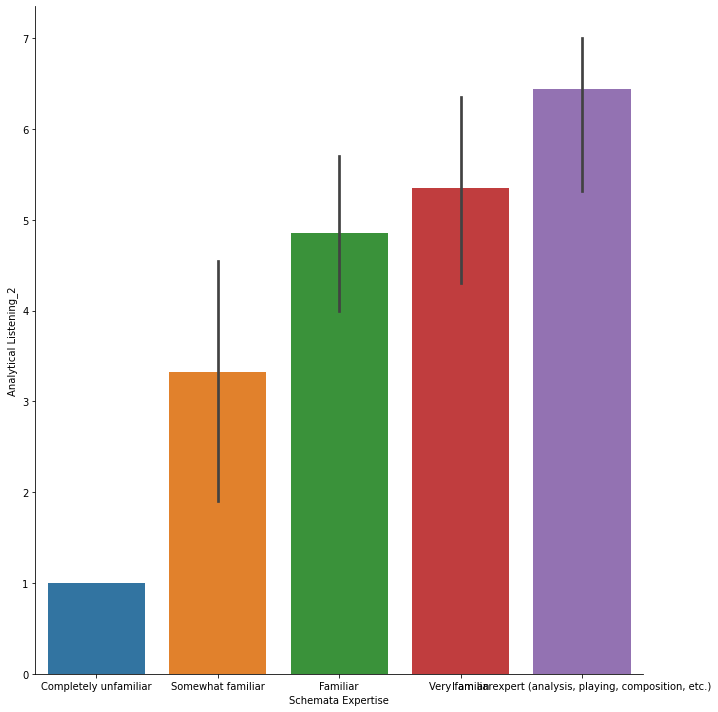

In [40]:
sns.catplot(data=df_bio, x="Schemata Expertise", y='Analytical Listening_2', kind='bar', 
            order=["Completely unfamiliar", "Somewhat familiar", "Familiar", "Very familiar", "I am an expert (analysis, playing, composition, etc.)"], 
           legend_out=True, height=10, aspect=1)


Using the function to create the expertise group bins:

In [41]:
expert_bio = expertise_creator(df_bio, "Schemata Expertise", "Analytical Listening_2")

expert_bio


/var/folders/mt/h79rxqm93kd9nvwlq48x46nh0000gp/T/ipykernel_3525/4009942276.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_series_intermediate = (((df_copy[col1] == 'Somewhat familiar') | (df_copy[col1] == 'Familiar') | (df_copy[col1] == 'Very familiar')) & (df_copy[col2].between(3, 7, True)))
/var/folders/mt/h79rxqm93kd9nvwlq48x46nh0000gp/T/ipykernel_3525/4009942276.py:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_series_novice = (((df_copy[col1] == 'Completely unfamiliar') | (df_copy[col1] == 'Somewhat familiar') | (df_copy[col1] == 'Familiar')) & (df_copy[col2].between(0.9, 3, True)))


,Schemata Expertise,Analytical Listening_2,Expertise_Group
0,Completely unfamiliar,1.0,Novice
1,Familiar,5.7,Intermediate
2,Somewhat familiar,4.5,Intermediate
3,Very familiar,4.9,Intermediate
4,Very familiar,7.0,Intermediate
5,"I am an expert (analysis, playing, composition, etc.)",7.0,Expert
6,Somewhat familiar,2.0,Novice
7,Somewhat familiar,5.1,Intermediate
8,Completely unfamiliar,1.0,Novice
9,Familiar,4.0,Intermediate


In [42]:
expert_bio.Expertise_Group.value_counts()

Intermediate    11
Expert           5
Novice           4
Name: Expertise_Group, dtype: int64

Participants at indices 14 and 17 were contacted specifically because of their schemata expertise, I will therefore manually change their category to Expert:

In [43]:
append_it = expert_bio.loc[:, ['Expertise_Group']]

append_it.loc[14, "Expertise_Group"] = 'Expert'
append_it.loc[17, "Expertise_Group"] = 'Expert'

append_it

,Expertise_Group
0,Novice
1,Intermediate
2,Intermediate
3,Intermediate
4,Intermediate
5,Expert
6,Novice
7,Intermediate
8,Novice
9,Intermediate


In [44]:
append_it.value_counts()

Expertise_Group
Intermediate       10
Expert              6
Novice              4
dtype: int64

Joining the newly created expertise labels to the bio data dataframe:

In [45]:
#join new column to bio_data

bio_data_1 = df_bio.join(append_it, how = 'left')

bio_data_1.Expertise_Group.value_counts()

Intermediate    10
Expert           6
Novice           4
Name: Expertise_Group, dtype: int64

In [46]:
bio_data_1.head()

,Education / Training,Education / Training_5_TEXT,Years Theory,Years Skills,Q114,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,Perfect Pitch?,Interpretation App,Interpretation App_8_TEXT,Expertise_Group
0,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Completely unfamiliar,I have heard this before,"No, not at all",7.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Novice
1,Graduate Student,NaN,5-10 years,5-10 years,Somewhat fluent,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,No,I imagined scale degrees or solfege as I listened,NaN,Intermediate
2,Graduate Student,NaN,1-2 years,3-5 years,Fluent,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,No,"I imagined scale degrees or solfege as I listened,I sang or spoke (without scale degrees or solfege)",NaN,Intermediate
3,Graduate Student,NaN,5-10 years,5-10 years,Fluent,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate
4,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Very familiar,This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate


#### Solfege Expertise

I will create corresponding solfege expertise categories:

In [47]:
df.columns # rechecking column names

Index(['index', 'Intro: RABBIT_1', 'Intro: DUCK_1', 'Intro: Ease_1', 'Q143_1',
       'Q146_1', 'Q145_1', 'Expo: Bassline Tonic_1', 'Expo: Bassline Mod _1',
       'Expo: Bassline Ease_2', 'Expo: Bassline Mod_1',
       'Expo: Bassline Tonic_1.1', 'Expo: Bassline Ease_1',
       'Expo: Soprano Tonic_1', 'Expo: Soprano Mod_1', 'Expo: Soprano Ease_1',
       'Expo: Soprano Mod_1.1', 'Expo: Soprano Tonic_1.1',
       'Expo: Soprano Ease _1', 'Expo: Schema Tonic_1', 'Expo: Schema Mod_1',
       'Expo: Schema Ease_1', 'Expo: Schema Mod_1.1', 'Expo: Schema Tonic_1',
       'Expo: Schema Ease_1.1', 'Recap: Bass Tonic_1', 'Recap: Bass Mod_1',
       'Recap: Bass Ease_1', 'Recap: Bass Mod_1.1', 'Recap: Bass Tonic_1.1',
       'Recap: Bass Ease_1.1', 'Recap: Sop Tonic_1', 'Recap: Sop Mod_1',
       'Recap: Sop Ease_1', 'Recap: Sop Mod_1.1', 'Recap: Sop Tonic_1.1',
       'Recap: Sop Ease_1.1', 'Recap: Schema Tonic_1', 'Recap: Schema Mod_1',
       'Recap: Schema Ease_1', 'Recap: Schema Mod_1.1',

The survey Question 114 contains the information regarding solfege expertise:

In [48]:
df_bio.Q114.unique() 

array(['I am an expert, scale degree hearing is effortless',
       'Somewhat fluent', 'Fluent', 'Very fluent'], dtype=object)

In [49]:
def expertise_creator_solf(df, col1, col2):

    '''This function takes in a dataframe and twol columns in order to make solfege expertise category bins.'''
    
    df_copy = df.loc[:, [col1, col2]].copy()
    
    b_series_expert_solf = (((df_copy[col1] == 'I am an expert, scale degree hearing is effortless')) & (df_copy[col2] >= 6))
    
    b_series_intermediate_solf = (((df_copy[col1] == 'Somewhat fluent') | (df_copy[col1] == 'Fluent') | (df_copy[col1] == 'Very fluent')) & (df_copy[col2].between(3, 7, True)))
    
    b_series_novice_solf = (((df_copy[col1] == 'Somewhat fluent') | (df_copy[col1] == 'Fluent') | (df_copy[col1] == 'Not fluent at all')) & (df_copy[col2].between(0.9, 3, True)))
    
    df_copy['Expertise_Group_solf'] = None
    
    df_copy.loc[b_series_expert_solf, 'Expertise_Group_solf'] = "Expert"
    df_copy.loc[b_series_intermediate_solf, 'Expertise_Group_solf'] = "Intermediate"
    df_copy.loc[b_series_novice_solf, 'Expertise_Group_solf'] = "Novice"
    
    return df_copy

In [50]:
expert_bio_solf = expertise_creator_solf(df_bio, "Q114", "Analytical Listening_1")

expert_bio_solf.loc[14, "Expertise_Group_solf"] = "Expert"

expert_bio_solf


/var/folders/mt/h79rxqm93kd9nvwlq48x46nh0000gp/T/ipykernel_3525/3992789988.py:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_series_intermediate_solf = (((df_copy[col1] == 'Somewhat fluent') | (df_copy[col1] == 'Fluent') | (df_copy[col1] == 'Very fluent')) & (df_copy[col2].between(3, 7, True)))
/var/folders/mt/h79rxqm93kd9nvwlq48x46nh0000gp/T/ipykernel_3525/3992789988.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  b_series_novice_solf = (((df_copy[col1] == 'Somewhat fluent') | (df_copy[col1] == 'Fluent') | (df_copy[col1] == 'Not fluent at all')) & (df_copy[col2].between(0.9, 3, True)))


,Q114,Analytical Listening_1,Expertise_Group_solf
0,"I am an expert, scale degree hearing is effortless",7.0,Expert
1,Somewhat fluent,6.2,Intermediate
2,Fluent,5.3,Intermediate
3,Fluent,5.5,Intermediate
4,"I am an expert, scale degree hearing is effortless",7.0,Expert
5,"I am an expert, scale degree hearing is effortless",7.0,Expert
6,Somewhat fluent,4.0,Intermediate
7,Fluent,6.0,Intermediate
8,Fluent,4.0,Intermediate
9,Very fluent,6.1,Intermediate


In [51]:
append_it2 = expert_bio_solf.loc[:, ['Expertise_Group_solf']]

append_it2

,Expertise_Group_solf
0,Expert
1,Intermediate
2,Intermediate
3,Intermediate
4,Expert
5,Expert
6,Intermediate
7,Intermediate
8,Intermediate
9,Intermediate


In [52]:
bio_data_all = bio_data_1.join(append_it2, how = 'left') # appending this to the bio dataframe

bio_data_all.isnull().sum()

Education / Training            0
Education / Training_5_TEXT    19
Years Theory                    0
Years Skills                    0
Q114                            0
Schemata Expertise              0
Excerpt Familiarity             0
Excerpt Analysis                0
Analytical Listening_1          0
Analytical Listening_2          0
Perfect Pitch?                  0
Interpretation App              0
Interpretation App_8_TEXT      19
Expertise_Group                 0
Expertise_Group_solf            0
dtype: int64

In [53]:
bio_data_all.Expertise_Group.value_counts()

Intermediate    10
Expert           6
Novice           4
Name: Expertise_Group, dtype: int64

In [54]:
bio_data_all.head()

,Education / Training,Education / Training_5_TEXT,Years Theory,Years Skills,Q114,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,Perfect Pitch?,Interpretation App,Interpretation App_8_TEXT,Expertise_Group,Expertise_Group_solf
0,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Completely unfamiliar,I have heard this before,"No, not at all",7.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Novice,Expert
1,Graduate Student,NaN,5-10 years,5-10 years,Somewhat fluent,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,No,I imagined scale degrees or solfege as I listened,NaN,Intermediate,Intermediate
2,Graduate Student,NaN,1-2 years,3-5 years,Fluent,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,No,"I imagined scale degrees or solfege as I listened,I sang or spoke (without scale degrees or solfege)",NaN,Intermediate,Intermediate
3,Graduate Student,NaN,5-10 years,5-10 years,Fluent,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Intermediate
4,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Very familiar,This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Expert


#### iii. Aggregating Block Orders

Lastly, I will need to create concise, aggregated columns reflecting the block orders of the survey completed by each participant.

In [55]:
df_order.head(5) # checking the order dataframe

,FL_10_DO,FL_38_DO,FL_7_DO,FL_42_DO,FL_46_DO,FL_57_DO,FL_60_DO,FL_68_DO,FL_72_DO
0,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order2)
1,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_58|FL_63|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order1)
2,FL_35|FL_33,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order1),FL_64|FL_63|FL_58,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1)
3,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order2),Recap:Schema(Order2)
4,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_64|FL_58,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1)


**Block Order Key**

ALL

FL_10 = Sonata Section Randomizer
FL_35 = Recap
FL_33 = Exposition

Form Order: Order 1 = Expo / Recap, Order 2 = Recap / Expo

Order 1 = FL_33|FL_35

-----------------------------------------
EXPOSITION

FL_38 = Expo Randomizer
FL_36 = Expo Bass Group
FL_37 = Expo Sop Group
FL_39 = Expo Schema Group

FL_7 = Expo Bass Randomizer
FL_42 = Expo Sop Randomizer
FL_46 = Expo Schema Randomizer

Concept Order: Order 1 = Bass / Sop / Schema, Order 2 = 

----------------------------------------
RECAP

FL_57 = Recap Randomizer
FL_58 = Recap Bass Group
FL_67 = Recp Sop Group
FL_71 = Recap Schema Group

FL_60 = Recap Bass Randomizer
FL_68 = Recap Sop Randomizer
FL_72 = Recap Schema Randomizer 

--------------------------------------

Order 1 = Tonic then Mod (Romanesca then Prinner)
Order 2 = Mod then Tonic (Prinner then Romanesca)

In order to specify the...orders, I will use permutations to create them from the list of possible DV groups:

In [56]:
#EXPOSITION ORDERS

from itertools import permutations

Expo_Concept = ['FL_36 = Expo Bass Group', 'FL_37 = Expo Sop Group','FL_39 = Expo Schema Group']

print(list(permutations(Expo_Concept, 3)))


[('FL_36 = Expo Bass Group', 'FL_37 = Expo Sop Group', 'FL_39 = Expo Schema Group'), ('FL_36 = Expo Bass Group', 'FL_39 = Expo Schema Group', 'FL_37 = Expo Sop Group'), ('FL_37 = Expo Sop Group', 'FL_36 = Expo Bass Group', 'FL_39 = Expo Schema Group'), ('FL_37 = Expo Sop Group', 'FL_39 = Expo Schema Group', 'FL_36 = Expo Bass Group'), ('FL_39 = Expo Schema Group', 'FL_36 = Expo Bass Group', 'FL_37 = Expo Sop Group'), ('FL_39 = Expo Schema Group', 'FL_37 = Expo Sop Group', 'FL_36 = Expo Bass Group')]


#### Exposition Concept Orders

**Order Keys**

- Order 1 = 'FL_36 = Expo Bass Group', 'FL_37 = Expo Sop Group', 'FL_39 = Expo Schema Group'
- Order 2 = 'FL_36 = Expo Bass Group', 'FL_39 = Expo Schema Group', 'FL_37 = Expo Sop Group'
- Order 3 = 'FL_37 = Expo Sop Group', 'FL_36 = Expo Bass Group', 'FL_39 = Expo Schema Group'
- Order 4 = 'FL_37 = Expo Sop Group', 'FL_39 = Expo Schema Group', 'FL_36 = Expo Bass Group'
- Order 5 = 'FL_39 = Expo Schema Group', 'FL_36 = Expo Bass Group', 'FL_37 = Expo Sop Group'
- Order 6 = 'FL_39 = Expo Schema Group', 'FL_37 = Expo Sop Group', 'FL_36 = Expo Bass Group'

**Orders Only**

- Order 1 = 'FL_36|FL_37|FL_39'
- Order 2 = 'FL_36|FL_39|FL_37'
- Order 3 = 'FL_37|FL_36|FL_39'
- Order 4 = 'FL_37|FL_39|FL_36'
- Order 5 = 'FL_39|FL_36|FL_37'
- Order 6 = 'FL_39|FL_37|FL_36'

Repeating the same process with the recap stimuli:

In [57]:
#RECAP ORDERS

Recap_Concept = ['FL_58 = Recap Bass Group','FL_63 = Recp Sop Group','FL_64 = Recap Schema Group']

print(list(permutations(Recap_Concept, 3)))

[('FL_58 = Recap Bass Group', 'FL_63 = Recp Sop Group', 'FL_64 = Recap Schema Group'), ('FL_58 = Recap Bass Group', 'FL_64 = Recap Schema Group', 'FL_63 = Recp Sop Group'), ('FL_63 = Recp Sop Group', 'FL_58 = Recap Bass Group', 'FL_64 = Recap Schema Group'), ('FL_63 = Recp Sop Group', 'FL_64 = Recap Schema Group', 'FL_58 = Recap Bass Group'), ('FL_64 = Recap Schema Group', 'FL_58 = Recap Bass Group', 'FL_63 = Recp Sop Group'), ('FL_64 = Recap Schema Group', 'FL_63 = Recp Sop Group', 'FL_58 = Recap Bass Group')]


#### Recap Concept Orders

**Order Only**

- Order 1 = 'FL_58|FL_63|FL_64'
- Order 2 = 'FL_58|FL_64|FL_63'
- Order 3 = 'FL_63|FL_58|FL_64'
- Order 4 = 'FL_63|FL_64|FL_58'
- Order 5 = 'FL_64|FL_58|FL_63'
- Order 6 = 'FL_64|FL_63|FL_58'

**Order Keys**

'FL_58 = Recap Bass Group', 'FL_67 = Recp Sop Group', 'FL_71 = Recap Schema Group'), ('FL_58 = Recap Bass Group', 'FL_71 = Recap Schema Group', 'FL_67 = Recp Sop Group'), ('FL_67 = Recp Sop Group', 'FL_58 = Recap Bass Group', 'FL_71 = Recap Schema Group'), ('FL_67 = Recp Sop Group', 'FL_71 = Recap Schema Group', 'FL_58 = Recap Bass Group'), ('FL_71 = Recap Schema Group', 'FL_58 = Recap Bass Group', 'FL_67 = Recp Sop Group'), ('FL_71 = Recap Schema Group', 'FL_67 = Recp Sop Group', 'FL_58 = Recap Bass Group')]

#### Creating Block Order Columns


**Sonata Form**

`Sonata Order:` 1 or 2

**Exposition**

`Expo Order:` 1, 2, 3, 4, 5, 6

**Recap**

`Recap Order:` 1, 2, 3, 4, 5, 6

**Stimuli Orderings**

- `Expo: Bass Order` 1, 2
- `Expo: Sop Order` 1, 2
- `Expo: Schema Order` 1, 2 

- `Recap: Bass Order` 1, 2
- `Recap: Sop Order` 1, 2
- `Recap: Schema Order` 1, 2 

In [58]:

#Sonata Order 

Sonata_Order_Conditions = [
    (df_order['FL_10_DO'] == "FL_33|FL_35"),
    (df_order['FL_10_DO'] == "FL_35|FL_33")
]

Sonata_Orders = [1, 2]

df_order["Sonata Order"] = np.select(Sonata_Order_Conditions, Sonata_Orders)


In [59]:
#Expo Orders

Expo_Order_Conditions = [
    (df_order['FL_38_DO'] == 'FL_36|FL_37|FL_39'),
    (df_order['FL_38_DO'] == 'FL_36|FL_39|FL_37'),
    (df_order['FL_38_DO'] == 'FL_37|FL_36|FL_39'),
    (df_order['FL_38_DO'] == 'FL_37|FL_39|FL_36'),
    (df_order['FL_38_DO'] == 'FL_39|FL_36|FL_37'),
    (df_order['FL_38_DO'] == 'FL_39|FL_37|FL_36')
]

Expo_Orders = [1,2,3,4,5,6]

df_order["Expo Order"] = np.select(Expo_Order_Conditions, Expo_Orders)

In [60]:
#Expo: Bass Order

Expo_Bass_Order_Conditions = [
    (df_order['FL_7_DO'] == 'Exposition:Bassline(Order1)'),
    (df_order['FL_7_DO'] == 'Exposition:Bassline(Order2)')    
]

Expo_Bass_Order = [1,2]


df_order["Expo Bass Order"] =np.select(Expo_Bass_Order_Conditions, Expo_Bass_Order)

#Expo: Sop Order

Expo_Sop_Order_Conditions = [
    (df_order['FL_42_DO'] == 'Exposition:Soprano(Order1)'),
    (df_order['FL_42_DO'] == 'Exposition:Soprano(Order2)')    
]

Expo_Sop_Order = [1,2]


df_order["Expo Sop Order"] =np.select(Expo_Sop_Order_Conditions, Expo_Sop_Order)

#Expo: Schema Order

Expo_Schema_Order_Conditions = [
    (df_order['FL_46_DO'] == 'Exposition:Schema(Order1)'),
    (df_order['FL_46_DO'] == 'Exposition:Schema(Order2)')    
]

Expo_Schema_Order = [1,2]


df_order["Expo Schema Order"] =np.select(Expo_Schema_Order_Conditions, Expo_Schema_Order)

In [61]:
#Recap Orders

Recap_Order_Conditions = [
    (df_order['FL_57_DO'] == 'FL_58|FL_63|FL_64'),
    (df_order['FL_57_DO'] == 'FL_58|FL_64|FL_63'),
    (df_order['FL_57_DO'] == 'FL_63|FL_58|FL_64'),
    (df_order['FL_57_DO'] == 'FL_63|FL_64|FL_58'),
    (df_order['FL_57_DO'] == 'FL_64|FL_58|FL_63'),
    (df_order['FL_57_DO'] == 'FL_64|FL_63|FL_58')
]

Recap_Orders = [1,2,3,4,5,6]

df_order["Recap Order"] = np.select(Recap_Order_Conditions, Recap_Orders)

In [62]:
#Recap: Bass Order

Recap_Bass_Order_Conditions = [
    (df_order['FL_60_DO'] == 'Recap:Bassline(Order1)'),
    (df_order['FL_60_DO'] == 'Recap:Bassline(Order2)')    
]

Recap_Bass_Order = [1,2]


df_order["Recap Bass Order"] =np.select(Recap_Bass_Order_Conditions, Recap_Bass_Order)

#Recap: Sop Order

Recap_Sop_Order_Conditions = [
    (df_order['FL_68_DO'] == 'Recap:Soprano(Order1)'),
    (df_order['FL_68_DO'] == 'Recap:Soprano(Order2)')    
]

Recap_Sop_Order = [1,2]


df_order["Recap Sop Order"] =np.select(Recap_Sop_Order_Conditions, Recap_Sop_Order)

#Recap: Schema Order

Recap_Schema_Order_Conditions = [
    (df_order['FL_72_DO'] == 'Recap:Schema(Order1)'),
    (df_order['FL_72_DO'] == 'Recap:Schema(Order2)')    
]

Recap_Schema_Order = [1,2]


df_order["Recap Schema Order"] =np.select(Recap_Schema_Order_Conditions, Recap_Schema_Order)

In [63]:
df_order

,FL_10_DO,FL_38_DO,FL_7_DO,FL_42_DO,FL_46_DO,FL_57_DO,FL_60_DO,FL_68_DO,FL_72_DO,Sonata Order,Expo Order,Expo Bass Order,Expo Sop Order,Expo Schema Order,Recap Order,Recap Bass Order,Recap Sop Order,Recap Schema Order
0,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order2),2,5,1,1,2,3,1,1,2
1,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_58|FL_63|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order1),1,3,2,2,2,1,2,2,1
2,FL_35|FL_33,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order1),FL_64|FL_63|FL_58,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1),2,3,2,2,1,6,2,1,1
3,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order2),Recap:Schema(Order2),1,3,1,1,1,3,1,2,2
4,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_64|FL_58,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1),2,1,2,1,1,4,1,1,1
5,FL_35|FL_33,FL_36|FL_39|FL_37,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_64|FL_58|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2),2,2,2,2,2,5,2,2,2
6,FL_33|FL_35,FL_39|FL_37|FL_36,Exposition:Bassline(Order1),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1),1,6,1,2,2,3,1,1,1
7,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order2),2,5,1,1,1,3,2,1,2
8,FL_35|FL_33,FL_39|FL_37|FL_36,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_58|FL_64|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2),2,6,2,1,1,2,2,2,2
9,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1),2,1,1,1,1,3,2,1,1


In [64]:
df_order.columns

Index(['FL_10_DO', 'FL_38_DO', 'FL_7_DO', 'FL_42_DO', 'FL_46_DO', 'FL_57_DO',
       'FL_60_DO', 'FL_68_DO', 'FL_72_DO', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order'],
      dtype='object')

Making a dataframe of only the newly created order columns:

In [65]:
df_order_num = df_order.loc[:, ['Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_order_num.dtypes # checking the datatypes

Sonata Order          int64
Expo Order            int64
Expo Bass Order       int64
Expo Sop Order        int64
Expo Schema Order     int64
Recap Order           int64
Recap Bass Order      int64
Recap Sop Order       int64
Recap Schema Order    int64
dtype: object

In [66]:
df_order

,FL_10_DO,FL_38_DO,FL_7_DO,FL_42_DO,FL_46_DO,FL_57_DO,FL_60_DO,FL_68_DO,FL_72_DO,Sonata Order,Expo Order,Expo Bass Order,Expo Sop Order,Expo Schema Order,Recap Order,Recap Bass Order,Recap Sop Order,Recap Schema Order
0,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order2),2,5,1,1,2,3,1,1,2
1,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_58|FL_63|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order1),1,3,2,2,2,1,2,2,1
2,FL_35|FL_33,FL_37|FL_36|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order1),FL_64|FL_63|FL_58,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1),2,3,2,2,1,6,2,1,1
3,FL_33|FL_35,FL_37|FL_36|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order2),Recap:Schema(Order2),1,3,1,1,1,3,1,2,2
4,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_64|FL_58,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1),2,1,2,1,1,4,1,1,1
5,FL_35|FL_33,FL_36|FL_39|FL_37,Exposition:Bassline(Order2),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_64|FL_58|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2),2,2,2,2,2,5,2,2,2
6,FL_33|FL_35,FL_39|FL_37|FL_36,Exposition:Bassline(Order1),Exposition:Soprano(Order2),Exposition:Schema(Order2),FL_63|FL_58|FL_64,Recap:Bassline(Order1),Recap:Soprano(Order1),Recap:Schema(Order1),1,6,1,2,2,3,1,1,1
7,FL_35|FL_33,FL_39|FL_36|FL_37,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order2),2,5,1,1,1,3,2,1,2
8,FL_35|FL_33,FL_39|FL_37|FL_36,Exposition:Bassline(Order2),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_58|FL_64|FL_63,Recap:Bassline(Order2),Recap:Soprano(Order2),Recap:Schema(Order2),2,6,2,1,1,2,2,2,2
9,FL_35|FL_33,FL_36|FL_37|FL_39,Exposition:Bassline(Order1),Exposition:Soprano(Order1),Exposition:Schema(Order1),FL_63|FL_58|FL_64,Recap:Bassline(Order2),Recap:Soprano(Order1),Recap:Schema(Order1),2,1,1,1,1,3,2,1,1


### e. Final Dataframe Aggregation and Pre-Processing 

Now I can finally create the aggregated versions of the dataframe! I will combine the data, bio data and order data altogether. 

#### i. Aggregate All (data + bio + order)

In [67]:
df_agg_data.reset_index(inplace=True)

df_agg_data.drop('index', axis=1, inplace=True)

In [68]:
df_agg_data

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,Recap: Bass Romanesca,Recap: Bass Prinner,Recap: Bass Change,Recap: Sop Romanesca,Recap: Sop Prinner,Recap: Sop Change,Recap: Schema Romanesca,Recap: Schema Prinner,Recap: Schema Change
0,913,7.0,2.9,3.0,1.0,6.0,1.0,4.3,6.3,4.2,4.1,7.0,4.2,1.0,4.7,1.0,4.1,7.0,4.1
1,834,5.1,5.4,4.7,6.1,2.8,3.8,5.0,6.6,5.0,5.5,5.2,4.7,5.4,6.9,5.1,6.0,6.3,4.5
2,719,6.5,5.9,6.0,6.9,6.5,6.4,6.8,6.9,6.9,5.7,6.4,6.8,5.0,6.0,5.4,5.6,6.3,5.3
3,862,4.6,5.8,6.0,2.4,5.2,3.4,6.2,7.0,4.9,5.0,7.0,5.0,1.6,2.7,1.9,4.7,7.0,3.2
4,686,7.0,6.2,6.3,7.0,6.3,7.0,6.7,6.7,7.0,7.0,5.6,6.2,6.3,6.0,5.2,7.0,6.1,6.5
5,358,6.5,7.0,6.5,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
6,998,5.0,4.0,1.0,4.0,4.0,1.0,2.0,4.0,1.0,5.1,3.0,1.0,4.0,2.0,1.0,4.0,4.0,2.0
7,473,5.2,1.3,1.2,6.5,1.4,1.3,6.0,1.2,1.3,7.0,2.5,1.2,6.0,1.3,1.0,6.4,1.8,1.6
8,895,1.0,7.0,1.0,3.5,2.0,1.0,1.0,1.0,1.0,6.0,6.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0
9,326,6.5,5.6,5.6,4.0,6.2,5.1,7.0,6.1,6.1,6.0,5.0,5.1,5.1,6.5,5.1,7.0,6.1,5.6


In [69]:
bio_data_all

,Education / Training,Education / Training_5_TEXT,Years Theory,Years Skills,Q114,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,Perfect Pitch?,Interpretation App,Interpretation App_8_TEXT,Expertise_Group,Expertise_Group_solf
0,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Completely unfamiliar,I have heard this before,"No, not at all",7.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Novice,Expert
1,Graduate Student,NaN,5-10 years,5-10 years,Somewhat fluent,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,No,I imagined scale degrees or solfege as I listened,NaN,Intermediate,Intermediate
2,Graduate Student,NaN,1-2 years,3-5 years,Fluent,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,No,"I imagined scale degrees or solfege as I listened,I sang or spoke (without scale degrees or solfege)",NaN,Intermediate,Intermediate
3,Graduate Student,NaN,5-10 years,5-10 years,Fluent,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Intermediate
4,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless",Very familiar,This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Expert
5,Professor,NaN,10 + years,10 + years,"I am an expert, scale degree hearing is effortless","I am an expert (analysis, playing, composition, etc.)",This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Expert,Expert
6,Postdoctoral Researcher,NaN,10 + years,10 + years,Somewhat fluent,Somewhat familiar,This was the first time I have heard this,"No, not at all",4.0,2.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening,I sang or spoke (without scale degrees or solfege)",NaN,Novice,Intermediate
7,Postdoctoral Researcher,NaN,10 + years,5-10 years,Fluent,Somewhat familiar,I have heard this before,"No, not at all",6.0,5.1,No,I spoke or sang scale degrees or solfege while listening,NaN,Intermediate,Intermediate
8,Graduate Student,NaN,5-10 years,5-10 years,Fluent,Completely unfamiliar,This was the first time I have heard this,"No, not at all",4.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I spoke or sang scale degrees or solfege while listening,I imagined or sung/spoke the interpretation between listenings,I sang or spoke (without scale degrees or solfege)",NaN,Novice,Intermediate
9,Graduate Student,NaN,5-10 years,3-5 years,Very fluent,Familiar,I am very familiar with this piece,"Yes, somewhat",6.1,4.0,No,I spoke or sang scale degrees or solfege while listening,NaN,Intermediate,Intermediate


In [70]:
df_data_and_bio = pd.concat([df_agg_data, bio_data_all], axis=1)

df_data_and_bio

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,...,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,Perfect Pitch?,Interpretation App,Interpretation App_8_TEXT,Expertise_Group,Expertise_Group_solf
0,913,7.0,2.9,3.0,1.0,6.0,1.0,4.3,6.3,4.2,...,Completely unfamiliar,I have heard this before,"No, not at all",7.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Novice,Expert
1,834,5.1,5.4,4.7,6.1,2.8,3.8,5.0,6.6,5.0,...,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,No,I imagined scale degrees or solfege as I listened,NaN,Intermediate,Intermediate
2,719,6.5,5.9,6.0,6.9,6.5,6.4,6.8,6.9,6.9,...,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,No,"I imagined scale degrees or solfege as I listened,I sang or spoke (without scale degrees or solfege)",NaN,Intermediate,Intermediate
3,862,4.6,5.8,6.0,2.4,5.2,3.4,6.2,7.0,4.9,...,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Intermediate
4,686,7.0,6.2,6.3,7.0,6.3,7.0,6.7,6.7,7.0,...,Very familiar,This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening",NaN,Intermediate,Expert
5,358,6.5,7.0,6.5,7.0,7.0,7.0,7.0,7.0,7.0,...,"I am an expert (analysis, playing, composition, etc.)",This was the first time I have heard this,"No, not at all",7.0,7.0,No,"I imagined scale degrees or solfege as I listened,I imagined or sung/spoke the interpretation between listenings",NaN,Expert,Expert
6,998,5.0,4.0,1.0,4.0,4.0,1.0,2.0,4.0,1.0,...,Somewhat familiar,This was the first time I have heard this,"No, not at all",4.0,2.0,No,"I imagined scale degrees or solfege as I listened,I subvocalized (silent rehearsal, spoken or sung) scale degrees or solfege while listening,I sang or spoke (without scale degrees or solfege)",NaN,Novice,Intermediate
7,473,5.2,1.3,1.2,6.5,1.4,1.3,6.0,1.2,1.3,...,Somewhat familiar,I have heard this before,"No, not at all",6.0,5.1,No,I spoke or sang scale degrees or solfege while listening,NaN,Intermediate,Intermediate
8,895,1.0,7.0,1.0,3.5,2.0,1.0,1.0,1.0,1.0,...,Completely unfamiliar,This was the first time I have heard this,"No, not at all",4.0,1.0,No,"I have no idea, I could just hear it!,I imagined scale degrees or solfege as I listened,I spoke or sang scale degrees or solfege while listening,I imagined or sung/spoke the interpretation between listenings,I sang or spoke (without scale degrees or solfege)",NaN,Novice,Intermediate
9,326,6.5,5.6,5.6,4.0,6.2,5.1,7.0,6.1,6.1,...,Familiar,I am very familiar with this piece,"Yes, somewhat",6.1,4.0,No,I spoke or sang scale degrees or solfege while listening,NaN,Intermediate,Intermediate


In [71]:
df_data_and_bio.isnull().sum()

Random IDs                      0
Expo: Bass Romanesca            0
Expo: Bass Prinner              0
Expo: Bass Change               0
Expo: Sop Romanesca             0
Expo: Sop Prinner               0
Expo: Sop Change                0
Expo: Schema Romanesca          0
Expo: Schema Prinner            0
Expo: Schema Change             0
Recap: Bass Romanesca           0
Recap: Bass Prinner             0
Recap: Bass Change              0
Recap: Sop Romanesca            0
Recap: Sop Prinner              0
Recap: Sop Change               0
Recap: Schema Romanesca         0
Recap: Schema Prinner           0
Recap: Schema Change            0
Education / Training            0
Education / Training_5_TEXT    19
Years Theory                    0
Years Skills                    0
Q114                            0
Schemata Expertise              0
Excerpt Familiarity             0
Excerpt Analysis                0
Analytical Listening_1          0
Analytical Listening_2          0
Perfect Pitch?

In [72]:
df_data_and_bio.Expertise_Group.value_counts()

Intermediate    10
Expert           6
Novice           4
Name: Expertise_Group, dtype: int64

In [73]:
df_LM = pd.concat([df_data_and_bio, df_order_num], axis=1)

df_LM

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,...,Expertise_Group_solf,Sonata Order,Expo Order,Expo Bass Order,Expo Sop Order,Expo Schema Order,Recap Order,Recap Bass Order,Recap Sop Order,Recap Schema Order
0,913,7.0,2.9,3.0,1.0,6.0,1.0,4.3,6.3,4.2,...,Expert,2,5,1,1,2,3,1,1,2
1,834,5.1,5.4,4.7,6.1,2.8,3.8,5.0,6.6,5.0,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,6.5,5.9,6.0,6.9,6.5,6.4,6.8,6.9,6.9,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,4.6,5.8,6.0,2.4,5.2,3.4,6.2,7.0,4.9,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,7.0,6.2,6.3,7.0,6.3,7.0,6.7,6.7,7.0,...,Expert,2,1,2,1,1,4,1,1,1
5,358,6.5,7.0,6.5,7.0,7.0,7.0,7.0,7.0,7.0,...,Expert,2,2,2,2,2,5,2,2,2
6,998,5.0,4.0,1.0,4.0,4.0,1.0,2.0,4.0,1.0,...,Intermediate,1,6,1,2,2,3,1,1,1
7,473,5.2,1.3,1.2,6.5,1.4,1.3,6.0,1.2,1.3,...,Intermediate,2,5,1,1,1,3,2,1,2
8,895,1.0,7.0,1.0,3.5,2.0,1.0,1.0,1.0,1.0,...,Intermediate,2,6,2,1,1,2,2,2,2
9,326,6.5,5.6,5.6,4.0,6.2,5.1,7.0,6.1,6.1,...,Intermediate,2,1,1,1,1,3,2,1,1


Checking the data:

In [74]:
df_LM.dtypes

df_LM['Schemata Expertise'].value_counts()

Very familiar                                            6
Somewhat familiar                                        5
I am an expert (analysis, playing, composition, etc.)    5
Completely unfamiliar                                    2
Familiar                                                 2
Name: Schemata Expertise, dtype: int64

In [75]:
df_LM['Excerpt Familiarity'].value_counts()

I have heard this before                     10
This was the first time I have heard this     9
I am very familiar with this piece            1
Name: Excerpt Familiarity, dtype: int64

In [76]:
df_LM.describe()

,Random IDs,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Bass Change,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Sop Change,Expo: Schema Romanesca,Expo: Schema Prinner,Expo: Schema Change,...,Analytical Listening_2,Sonata Order,Expo Order,Expo Bass Order,Expo Sop Order,Expo Schema Order,Recap Order,Recap Bass Order,Recap Sop Order,Recap Schema Order
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,...,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,579.550000,5.130000,5.61500,4.195000,4.615000,4.815000,3.620000,4.300000,5.725000,3.99500,...,4.630000,1.65000,3.05000,1.500000,1.500000,1.450000,3.60000,1.550000,1.450000,1.550000
std,259.836887,1.868887,1.69155,2.177027,2.121885,2.021015,2.277256,2.201435,1.873043,2.20704,...,2.112644,0.48936,1.79106,0.512989,0.512989,0.510418,1.63514,0.510418,0.510418,0.510418
min,148.000000,1.000000,1.30000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,375.250000,4.750000,5.05000,2.450000,3.225000,2.950000,1.225000,2.750000,5.275000,1.22500,...,3.750000,1.00000,1.00000,1.000000,1.000000,1.000000,2.75000,1.000000,1.000000,1.000000
50%,517.500000,5.150000,6.10000,4.850000,5.250000,5.250000,3.750000,4.350000,6.650000,4.35000,...,4.950000,2.00000,3.00000,1.500000,1.500000,1.000000,3.00000,2.000000,1.000000,2.000000
75%,841.000000,6.500000,7.00000,6.000000,6.200000,6.425000,5.425000,6.325000,7.000000,5.35000,...,6.775000,2.00000,5.00000,2.000000,2.000000,2.000000,5.00000,2.000000,2.000000,2.000000
max,998.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,...,7.000000,2.00000,6.00000,2.000000,2.000000,2.000000,6.00000,2.000000,2.000000,2.000000


#### ii. Long-Format: DV1

Here, I will create a new, long-form dataframe which can be used for statistical analysis in R and python. This means that *all* DV data will be aggregated into a single column, such that participant data is repeated throughout rather than existing on a single row.

In [77]:
df_LM.loc[:, ['Education / Training_5_TEXT', 'Interpretation App_8_TEXT']]

,Education / Training_5_TEXT,Interpretation App_8_TEXT
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [78]:
df_LM.columns

Index(['Random IDs', 'Expo: Bass Romanesca', 'Expo: Bass Prinner',
       'Expo: Bass Change', 'Expo: Sop Romanesca', 'Expo: Sop Prinner',
       'Expo: Sop Change', 'Expo: Schema Romanesca', 'Expo: Schema Prinner',
       'Expo: Schema Change', 'Recap: Bass Romanesca', 'Recap: Bass Prinner',
       'Recap: Bass Change', 'Recap: Sop Romanesca', 'Recap: Sop Prinner',
       'Recap: Sop Change', 'Recap: Schema Romanesca', 'Recap: Schema Prinner',
       'Recap: Schema Change', 'Education / Training',
       'Education / Training_5_TEXT', 'Years Theory', 'Years Skills', 'Q114',
       'Schemata Expertise', 'Excerpt Familiarity', 'Excerpt Analysis',
       'Analytical Listening_1', 'Analytical Listening_2', 'Perfect Pitch?',
       'Interpretation App', 'Interpretation App_8_TEXT', 'Expertise_Group',
       'Expertise_Group_solf', 'Sonata Order', 'Expo Order', 'Expo Bass Order',
       'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Reca

Dropping the unneeded columns:

In [79]:
df_LM.drop(columns=['Education / Training_5_TEXT', 'Interpretation App_8_TEXT'], inplace=True)


In [80]:
df_LM.columns

Index(['Random IDs', 'Expo: Bass Romanesca', 'Expo: Bass Prinner',
       'Expo: Bass Change', 'Expo: Sop Romanesca', 'Expo: Sop Prinner',
       'Expo: Sop Change', 'Expo: Schema Romanesca', 'Expo: Schema Prinner',
       'Expo: Schema Change', 'Recap: Bass Romanesca', 'Recap: Bass Prinner',
       'Recap: Bass Change', 'Recap: Sop Romanesca', 'Recap: Sop Prinner',
       'Recap: Sop Change', 'Recap: Schema Romanesca', 'Recap: Schema Prinner',
       'Recap: Schema Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Q114', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group',
       'Expertise_Group_solf', 'Sonata Order', 'Expo Order', 'Expo Bass Order',
       'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order'],
      dtype='object')

Here are separate dataframes including all participant data, as well as one single column of DV (e.g., Expo: Bass Romanesca, Recap: Sop Prinner).

In [81]:
df_BER = df_LM.loc[:, ['Random IDs', 'Expo: Bass Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_BEP = df_LM.loc[:, ['Random IDs', 'Expo: Bass Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_SER = df_LM.loc[:, ['Random IDs', 'Expo: Sop Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_SEP = df_LM.loc[:, ['Random IDs', 'Expo: Sop Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_ScER = df_LM.loc[:, ['Random IDs', 'Expo: Schema Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_ScEP = df_LM.loc[:, ['Random IDs', 'Expo: Schema Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]
#____________________________________________
#Recap Dataframes

df_BRR = df_LM.loc[:, ['Random IDs', 'Recap: Bass Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_BRP = df_LM.loc[:, ['Random IDs', 'Recap: Bass Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_SRR = df_LM.loc[:, ['Random IDs', 'Recap: Sop Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_SRP = df_LM.loc[:, ['Random IDs', 'Recap: Sop Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_ScRR = df_LM.loc[:, ['Random IDs', 'Recap: Schema Romanesca', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_ScRP = df_LM.loc[:, ['Random IDs', 'Recap: Schema Prinner', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]


In [82]:
df_BER.head(5)

,Random IDs,Expo: Bass Romanesca,Education / Training,Years Theory,Years Skills,Schemata Expertise,Excerpt Familiarity,Excerpt Analysis,Analytical Listening_1,Analytical Listening_2,...,Expertise_Group_solf,Sonata Order,Expo Order,Expo Bass Order,Expo Sop Order,Expo Schema Order,Recap Order,Recap Bass Order,Recap Sop Order,Recap Schema Order
0,913,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",7.0,1.0,...,Expert,2,5,1,1,2,3,1,1,2
1,834,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",6.2,5.7,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",5.3,4.5,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",5.5,4.9,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",7.0,7.0,...,Expert,2,1,2,1,1,4,1,1,1


In [83]:
#For converting columns to long format including variable types

def column_aggregator(df, nam1, nam2, nam3):


   '''This function takes in a dataframe, and three names [Formal region, attentional condition, modulating condition] and creates a long form dataframe for each.
   '''

   import pandas as pd
   import numpy as np
    
   global df_DV1

    # get the length of the df
    
   length = len(df)

    # make a df copy

   selected_cols = df.copy()

    # these are the new column names! 
   selected_cols.columns = ["Random_IDs", "DV", 'Education_Level', 'Years_Theory',
       'Years_Skills', 'Schemata_Expertise', 'Excerpt_Familiarity',
       'Excerpt_Analysis', 'Solfege_Hearing', 'Schema_Hearing',
       'Perfect_Pitch?', 'Interpretation_App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order']

   # creating an empty dataframe 
   df_DV1 = pd.DataFrame()

    # using the three names to get empty columns for each new column
   var1 = ([nam1]*length)
   var2 = ([nam2]*length)
   var3 = ([nam3]*length)
    
    # creating three new columns called Sonata_Section, Feature and Mod_Type
   selected_cols.insert(1, "Sonata_Section", var1)
   selected_cols.insert(2, "Feature", var2)
   selected_cols.insert(3, "Mod_Type", var3)


   # Concatenating all of the frames together, returning the result 
    
   result = pd.concat([df_DV1, selected_cols])

    
   return result

Creating the exposition dataframes:

In [84]:
#Expo New Frames
Bass_Expo_Rom = column_aggregator(df_BER, 'Exposition', 'Bass', 'Romanesca')
Bass_Expo_Prin = column_aggregator(df_BEP, 'Exposition', 'Bass', 'Prinner')

Sop_Expo_Rom = column_aggregator(df_SER, 'Exposition', 'Soprano', 'Romanesca')
Sop_Expo_Prin = column_aggregator(df_SEP, 'Exposition', 'Soprano', 'Prinner')

Sch_Expo_Rom = column_aggregator(df_ScER, 'Exposition', 'Schema', 'Romanesca')
Sch_Expo_Prin = column_aggregator(df_ScEP, 'Exposition', 'Schema', 'Prinner')


In [85]:
Bass_Expo_Rom.columns # checking work

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [86]:
Bass_Expo_Rom.Expertise_Group.value_counts()

Intermediate    10
Expert           6
Novice           4
Name: Expertise_Group, dtype: int64

In [87]:
Bass_Expo_Rom.loc[:, ['DV', 'Expertise_Group']].head() # this shows the newly created DV and expertise group

,DV,Expertise_Group
0,7.0,Novice
1,5.1,Intermediate
2,6.5,Intermediate
3,4.6,Intermediate
4,7.0,Intermediate


Repeat for the recap!

In [88]:
#Recap New Frames
Bass_Recap_Rom = column_aggregator(df_BRR, 'Recapitulation', 'Bass', 'Romanesca')
Bass_Recap_Prin = column_aggregator(df_BRP, 'Recapitulation', 'Bass', 'Prinner')

Sop_Recap_Rom = column_aggregator(df_SRR, 'Recapitulation', 'Soprano', 'Romanesca')
Sop_Recap_Prin = column_aggregator(df_SRP, 'Recapitulation', 'Soprano', 'Prinner')

Sch_Recap_Rom = column_aggregator(df_ScRR, 'Recapitulation', 'Schema', 'Romanesca')
Sch_Recap_Prin = column_aggregator(df_ScRP, 'Recapitulation', 'Schema', 'Prinner')


Concatenate all of the new frames together to create the DV long dataframe:

In [89]:
df_DV1_long = pd.concat([Bass_Expo_Rom , Bass_Expo_Prin, Sop_Expo_Rom, Sop_Expo_Prin, Sch_Expo_Rom, Sch_Expo_Prin, Bass_Recap_Rom, Bass_Recap_Prin, Sop_Recap_Rom, Sop_Recap_Prin, Sch_Recap_Rom, Sch_Recap_Prin])

df_DV1_long.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1


In [90]:
df_DV1_long[df_DV1_long['Expertise_Group'] == 'Novice'].Random_IDs.nunique()

4

In [91]:
df_DV1_long.isnull().sum()

Random_IDs              0
Sonata_Section          0
Feature                 0
Mod_Type                0
DV                      0
Education_Level         0
Years_Theory            0
Years_Skills            0
Schemata_Expertise      0
Excerpt_Familiarity     0
Excerpt_Analysis        0
Solfege_Hearing         0
Schema_Hearing          0
Perfect_Pitch?          0
Interpretation_App      0
Expertise_Group         0
Expertise_Group_solf    0
Sonata_Order            0
Expo_Order              0
Expo_Bass_Order         0
Expo_Sop_Order          0
Expo_Schema_Order       0
Recap_Order             0
Recap_Bass_Order        0
Recap_Sop_Order         0
Recap_Schema_Order      0
dtype: int64

#### iii. Long Format: DV2 (Ease of Change)

I will now repeat the process for DV2, each of change rating. 

In [92]:
def column_aggregator_DV2(df, nam1, nam2):

   '''This function repeats the process from column_aggregator, but for the DV2, ease of change rating'''

   import pandas as pd
   import numpy as np
    
   global df_DV2
    
   length = len(df)
   selected_cols = df.copy()
   selected_cols.columns = ["Random_IDs", "DV2", 'Education_Level', 'Years_Theory',
       'Years_Skills', 'Schemata_Expertise', 'Excerpt_Familiarity',
       'Excerpt_Analysis', 'Solfege_Hearing', 'Schema_Hearing',
       'Perfect_Pitch?', 'Interpretation_App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order']
   df_DV2 = pd.DataFrame()
   df_DV2 = pd.DataFrame()
   var1 = ([nam1]*length)
   var2 = ([nam2]*length)
    
   selected_cols.insert(1, "Sonata_Section", var1)
   selected_cols.insert(2, "Feature", var2)
   
    
   result = pd.concat([df_DV2, selected_cols])
   
    
   return result

Creating the DV2 Dataframes, each contains the IDs, bio info, order and one DV (e.g. Expo: Base Change)

In [93]:
df_BEE = df_LM.loc[:, ['Random IDs', 'Expo: Bass Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]



df_SEE = df_LM.loc[:, ['Random IDs', 'Expo: Sop Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]


df_ScEE = df_LM.loc[:, ['Random IDs', 'Expo: Schema Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

#____________________________________________
#Recap Dataframes

df_BRE = df_LM.loc[:, ['Random IDs', 'Recap: Bass Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]


df_SRE = df_LM.loc[:, ['Random IDs', 'Recap: Sop Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]


df_ScRE = df_LM.loc[:, ['Random IDs', 'Recap: Schema Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group', 'Expertise_Group_solf', 'Sonata Order', 'Expo Order',
       'Expo Bass Order', 'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order']]

df_LM.columns

Index(['Random IDs', 'Expo: Bass Romanesca', 'Expo: Bass Prinner',
       'Expo: Bass Change', 'Expo: Sop Romanesca', 'Expo: Sop Prinner',
       'Expo: Sop Change', 'Expo: Schema Romanesca', 'Expo: Schema Prinner',
       'Expo: Schema Change', 'Recap: Bass Romanesca', 'Recap: Bass Prinner',
       'Recap: Bass Change', 'Recap: Sop Romanesca', 'Recap: Sop Prinner',
       'Recap: Sop Change', 'Recap: Schema Romanesca', 'Recap: Schema Prinner',
       'Recap: Schema Change', 'Education / Training', 'Years Theory',
       'Years Skills', 'Q114', 'Schemata Expertise', 'Excerpt Familiarity',
       'Excerpt Analysis', 'Analytical Listening_1', 'Analytical Listening_2',
       'Perfect Pitch?', 'Interpretation App', 'Expertise_Group',
       'Expertise_Group_solf', 'Sonata Order', 'Expo Order', 'Expo Bass Order',
       'Expo Sop Order', 'Expo Schema Order', 'Recap Order',
       'Recap Bass Order', 'Recap Sop Order', 'Recap Schema Order'],
      dtype='object')

In [94]:
df_BEE.shape

(20, 23)

Using the function to create the new dataframes:

In [95]:
Bass_Expo_DV2 = column_aggregator_DV2(df_BEE, 'Exposition', 'Bass')

Sop_Expo_DV2 = column_aggregator_DV2(df_SEE, 'Exposition', 'Soprano')

Sch_Expo_DV2 = column_aggregator_DV2(df_ScEE, 'Exposition', 'Schema')

Bass_Recap_DV2 = column_aggregator_DV2(df_BRE, 'Recapitulation', 'Bass')

Sop_Recap_DV2 = column_aggregator_DV2(df_SRE, 'Recapitulation', 'Soprano')

Sch_Recap_DV2 = column_aggregator_DV2(df_ScRE, 'Recapitulation', 'Schema')


Bass_Expo_DV2.head()

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,3.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,4.7,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,6.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,6.3,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


Concatenating the new DV2 dataframes together:

In [96]:
df_DV2_long = pd.concat([Bass_Expo_DV2, Sop_Expo_DV2, Sch_Expo_DV2, Bass_Recap_DV2, Sop_Recap_DV2, Sch_Recap_DV2])

df_DV2_long.head(5)


,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,3.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,4.7,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,6.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,6.3,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


#### iv. Long-Format Dataframe: DV1 and DV2

Now I will concatenate both DV1 and DV2 long-format dataframes together. I first need to make sure that the 

In [97]:
df_DV1_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'Education_Level', 'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [98]:
df_DV2_long.columns

Index(['Random_IDs', 'Sonata_Section', 'Feature', 'DV2', 'Education_Level',
       'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'],
      dtype='object')

In [99]:
df_DV2_long.head()

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,3.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,4.7,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,6.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,6.3,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


In [100]:
df_Both_DVs_long = pd.merge(df_DV1_long, df_DV2_long, how='inner', on=['Random_IDs', 'Sonata_Section', 'Feature', 'Education_Level',
       'Years_Theory', 'Years_Skills', 'Schemata_Expertise',
       'Excerpt_Familiarity', 'Excerpt_Analysis', 'Solfege_Hearing',
       'Schema_Hearing', 'Perfect_Pitch?', 'Interpretation_App',
       'Expertise_Group', 'Expertise_Group_solf', 'Sonata_Order', 'Expo_Order',
       'Expo_Bass_Order', 'Expo_Sop_Order', 'Expo_Schema_Order', 'Recap_Order',
       'Recap_Bass_Order', 'Recap_Sop_Order', 'Recap_Schema_Order'])


df_Both_DVs_long.head()

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,DV2
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,2,5,1,1,2,3,1,1,2,3.0
1,913,Exposition,Bass,Prinner,2.9,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,2,5,1,1,2,3,1,1,2,3.0
2,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,1,3,2,2,2,1,2,2,1,4.7
3,834,Exposition,Bass,Prinner,5.4,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,1,3,2,2,2,1,2,2,1,4.7
4,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,2,3,2,2,1,6,2,1,1,6.0


In [101]:
column_to_move = df_Both_DVs_long.pop("DV2")

df_Both_DVs_long.insert(5, "DV2", column_to_move)

df_Both_DVs_long.head()

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,Expert,2,5,1,1,2,3,1,1,2
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,Intermediate,1,3,2,2,2,1,2,2,1
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,Intermediate,2,3,2,2,1,6,2,1,1


In [102]:
df_DV1_long.sort_values(["Random_IDs", "Sonata_Section", "Feature"], ascending=True)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
16,148,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Bass,Prinner,7.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Schema,Romanesca,7.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Schema,Prinner,4.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Soprano,Romanesca,5.5,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,...,Intermediate,1,5,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,998,Recapitulation,Bass,Prinner,3.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Recapitulation,Schema,Romanesca,4.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Recapitulation,Schema,Prinner,4.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Recapitulation,Soprano,Romanesca,4.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,...,Intermediate,1,6,1,2,2,3,1,1,1


In [103]:
df_Both_DVs_long.DV2.value_counts()

1.0    42
7.0    24
5.1    12
5.0    12
2.0    10
3.0    10
6.0    10
1.2     6
5.6     6
6.5     6
4.2     6
3.5     6
4.0     6
3.7     4
6.2     4
1.4     4
4.7     4
5.4     4
3.1     4
4.5     4
1.3     4
3.8     4
1.1     4
5.2     2
4.6     2
5.3     2
1.9     2
3.2     2
2.8     2
3.3     2
1.6     2
4.1     2
2.1     2
6.8     2
6.1     2
4.9     2
6.9     2
5.5     2
4.3     2
3.4     2
6.4     2
2.6     2
5.9     2
6.3     2
1.5     2
Name: DV2, dtype: int64

In [104]:
df_DV2_long.sort_values(["Random_IDs", "Sonata_Section", "Feature"], ascending=True)

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
16,148,Exposition,Bass,7.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Schema,4.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Exposition,Soprano,2.1,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Recapitulation,Bass,7.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,1,5,2,1,1,4,1,1,1
16,148,Recapitulation,Schema,6.0,Professor,10 + years,10 + years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,1,5,2,1,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,998,Exposition,Schema,1.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Exposition,Soprano,1.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Recapitulation,Bass,1.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,6,1,2,2,3,1,1,1
6,998,Recapitulation,Schema,2.0,Postdoctoral Researcher,10 + years,10 + years,Somewhat familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,6,1,2,2,3,1,1,1


### f. Multi-Index Frames

In [105]:
df_agg_data

df_multi_prepDV1 = df_agg_data.drop(columns=["Random IDs", 'Expo: Bass Change', 'Expo: Sop Change', 'Expo: Schema Change', 'Recap: Bass Change',
                                         'Recap: Sop Change', 'Recap: Schema Change'])

df_multi_prepDV1

,Expo: Bass Romanesca,Expo: Bass Prinner,Expo: Sop Romanesca,Expo: Sop Prinner,Expo: Schema Romanesca,Expo: Schema Prinner,Recap: Bass Romanesca,Recap: Bass Prinner,Recap: Sop Romanesca,Recap: Sop Prinner,Recap: Schema Romanesca,Recap: Schema Prinner
0,7.0,2.9,1.0,6.0,4.3,6.3,4.1,7.0,1.0,4.7,4.1,7.0
1,5.1,5.4,6.1,2.8,5.0,6.6,5.5,5.2,5.4,6.9,6.0,6.3
2,6.5,5.9,6.9,6.5,6.8,6.9,5.7,6.4,5.0,6.0,5.6,6.3
3,4.6,5.8,2.4,5.2,6.2,7.0,5.0,7.0,1.6,2.7,4.7,7.0
4,7.0,6.2,7.0,6.3,6.7,6.7,7.0,5.6,6.3,6.0,7.0,6.1
5,6.5,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
6,5.0,4.0,4.0,4.0,2.0,4.0,5.1,3.0,4.0,2.0,4.0,4.0
7,5.2,1.3,6.5,1.4,6.0,1.2,7.0,2.5,6.0,1.3,6.4,1.8
8,1.0,7.0,3.5,2.0,1.0,1.0,6.0,6.0,2.0,2.0,1.0,1.0
9,6.5,5.6,4.0,6.2,7.0,6.1,6.0,5.0,5.1,6.5,7.0,6.1


In [106]:
data = df_multi_prepDV1.to_numpy(dtype=float)

data

array([[7. , 2.9, 1. , 6. , 4.3, 6.3, 4.1, 7. , 1. , 4.7, 4.1, 7. ],
       [5.1, 5.4, 6.1, 2.8, 5. , 6.6, 5.5, 5.2, 5.4, 6.9, 6. , 6.3],
       [6.5, 5.9, 6.9, 6.5, 6.8, 6.9, 5.7, 6.4, 5. , 6. , 5.6, 6.3],
       [4.6, 5.8, 2.4, 5.2, 6.2, 7. , 5. , 7. , 1.6, 2.7, 4.7, 7. ],
       [7. , 6.2, 7. , 6.3, 6.7, 6.7, 7. , 5.6, 6.3, 6. , 7. , 6.1],
       [6.5, 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. , 7. ],
       [5. , 4. , 4. , 4. , 2. , 4. , 5.1, 3. , 4. , 2. , 4. , 4. ],
       [5.2, 1.3, 6.5, 1.4, 6. , 1.2, 7. , 2.5, 6. , 1.3, 6.4, 1.8],
       [1. , 7. , 3.5, 2. , 1. , 1. , 6. , 6. , 2. , 2. , 1. , 1. ],
       [6.5, 5.6, 4. , 6.2, 7. , 6.1, 6. , 5. , 5.1, 6.5, 7. , 6.1],
       [1. , 7. , 1. , 1. , 1. , 4.6, 7. , 4.3, 1. , 1. , 1. , 7. ],
       [6.1, 3. , 5.8, 2.6, 3.5, 5.6, 6.5, 2.4, 3. , 1.9, 1.5, 6.2],
       [4.3, 6.1, 5.2, 6.4, 5. , 7. , 6.2, 3.7, 7. , 7. , 6.2, 7. ],
       [2. , 7. , 1. , 7. , 1. , 7. , 7. , 7. , 2. , 7. , 2. , 7. ],
       [5. , 6.1, 5.3, 5.1, 4.4, 7

In [107]:
columns_idx = pd.MultiIndex.from_product([["Exposition", "Recapitulation"], 
                                           ["Bass", "Sorpano", "Schema"], 
                                           ["Romanesca", "Prinner"]], 
                                         names=['Sonata Section:', 'Feature:', 'Mod Type:'])
columns_idx
    

MultiIndex([(    'Exposition',    'Bass', 'Romanesca'),
            (    'Exposition',    'Bass',   'Prinner'),
            (    'Exposition', 'Sorpano', 'Romanesca'),
            (    'Exposition', 'Sorpano',   'Prinner'),
            (    'Exposition',  'Schema', 'Romanesca'),
            (    'Exposition',  'Schema',   'Prinner'),
            ('Recapitulation',    'Bass', 'Romanesca'),
            ('Recapitulation',    'Bass',   'Prinner'),
            ('Recapitulation', 'Sorpano', 'Romanesca'),
            ('Recapitulation', 'Sorpano',   'Prinner'),
            ('Recapitulation',  'Schema', 'Romanesca'),
            ('Recapitulation',  'Schema',   'Prinner')],
           names=['Sonata Section:', 'Feature:', 'Mod Type:'])

In [108]:
df_Multi_DV1 = pd.DataFrame(data=data, columns=columns_idx)

df_Multi_DV1

Sonata Section: Exposition                                              \
Feature:              Bass           Sorpano            Schema           
Mod Type:        Romanesca Prinner Romanesca Prinner Romanesca Prinner   
0                      7.0     2.9       1.0     6.0       4.3     6.3   
1                      5.1     5.4       6.1     2.8       5.0     6.6   
2                      6.5     5.9       6.9     6.5       6.8     6.9   
3                      4.6     5.8       2.4     5.2       6.2     7.0   
4                      7.0     6.2       7.0     6.3       6.7     6.7   
5                      6.5     7.0       7.0     7.0       7.0     7.0   
6                      5.0     4.0       4.0     4.0       2.0     4.0   
7                      5.2     1.3       6.5     1.4       6.0     1.2   
8                      1.0     7.0       3.5     2.0       1.0     1.0   
9                      6.5     5.6       4.0     6.2       7.0     6.1   
10                     1.0     7.0       1.0     1.0       1.0     4.6   
11                     6.1     3.0       5.8     2.6       3.5     5.6   
12                     4.3     6.1       5.2     6.4       5.0     7.0   
13                     2.0     7.0       1.0     7.0       1.0     7.0   
14                     5.0     6.1       5.3     5.1       4.4     7.0   
15                     5.0     7.0       6.0     7.0       3.0     7.0   
16                     7.0     7.0       5.5     3.0       7.0     4.0   
17                     4.8     7.0       2.1     7.0       1.1     7.0   
18                     7.0     7.0       7.0     5.3       4.0     7.0   
19                     6.0     4.0       5.0     4.5       4.0     5.5   

Sonata Section: Recapitulation                                              
Feature:                  Bass           Sorpano            Schema          
Mod Type:            Romanesca Prinner Romanesca Prinner Romanesca Prinner  
0                          4.1     7.0       1.0     4.7       4.1     7.0  
1                          5.5     5.2       5.4     6.9       6.0     6.3  
2                          5.7     6.4       5.0     6.0       5.6     6.3  
3                          5.0     7.0       1.6     2.7       4.7     7.0  
4                          7.0     5.6       6.3     6.0       7.0     6.1  
5                          7.0     7.0       7.0     7.0       7.0     7.0  
6                          5.1     3.0       4.0     2.0       4.0     4.0  
7                          7.0     2.5       6.0     1.3       6.4     1.8  
8                          6.0     6.0       2.0     2.0       1.0     1.0  
9                          6.0     5.0       5.1     6.5       7.0     6.1  
10                         7.0     4.3       1.0     1.0       1.0     7.0  
11                         6.5     2.4       3.0     1.9       1.5     6.2  
12                         6.2     3.7       7.0     7.0       6.2     7.0  
13                         7.0     7.0       2.0     7.0       2.0     7.0  
14                         5.1     3.1       3.8     3.0       3.0     4.5  
15                         3.0     7.0       7.0     1.2       1.5     7.0  
16                         7.0     7.0       5.5     3.0       7.0     6.0  
17                         5.2     7.0       2.3     7.0       1.2     7.0  
18                         7.0     7.0       6.3     5.0       5.6     7.0  
19                         6.0     5.0       6.0     4.0       4.0     5.0

In [109]:
df_multi_prepDV2 = df_agg_data.loc[:, ['Expo: Bass Change', 'Expo: Sop Change', 'Expo: Schema Change', 'Recap: Bass Change',
                                         'Recap: Sop Change', 'Recap: Schema Change']]

df_multi_prepDV2


,Expo: Bass Change,Expo: Sop Change,Expo: Schema Change,Recap: Bass Change,Recap: Sop Change,Recap: Schema Change
0,3.0,1.0,4.2,4.2,1.0,4.1
1,4.7,3.8,5.0,4.7,5.1,4.5
2,6.0,6.4,6.9,6.8,5.4,5.3
3,6.0,3.4,4.9,5.0,1.9,3.2
4,6.3,7.0,7.0,6.2,5.2,6.5
5,6.5,7.0,7.0,7.0,7.0,7.0
6,1.0,1.0,1.0,1.0,1.0,2.0
7,1.2,1.3,1.3,1.2,1.0,1.6
8,1.0,1.0,1.0,3.0,1.0,1.0
9,5.6,5.1,6.1,5.1,5.1,5.6


In [110]:
data2 = df_multi_prepDV2.to_numpy(dtype=float)

data2

columns_idx_DV2 = pd.MultiIndex.from_product( [["Exposition", "Recapitulation"], 
                                           ["Bass", "Sorpano", "Schema"]],
                                            names=['Sonata Section:', 'Feature:'])
columns_idx_DV2

df_Multi_DV2 = pd.DataFrame(data=data2, columns=columns_idx_DV2)

df_Multi_DV2


Sonata Section: Exposition                Recapitulation               
Feature:              Bass Sorpano Schema           Bass Sorpano Schema
0                      3.0     1.0    4.2            4.2     1.0    4.1
1                      4.7     3.8    5.0            4.7     5.1    4.5
2                      6.0     6.4    6.9            6.8     5.4    5.3
3                      6.0     3.4    4.9            5.0     1.9    3.2
4                      6.3     7.0    7.0            6.2     5.2    6.5
5                      6.5     7.0    7.0            7.0     7.0    7.0
6                      1.0     1.0    1.0            1.0     1.0    2.0
7                      1.2     1.3    1.3            1.2     1.0    1.6
8                      1.0     1.0    1.0            3.0     1.0    1.0
9                      5.6     5.1    6.1            5.1     5.1    5.6
10                     1.0     1.0    1.0            2.0     1.0    6.5
11                     5.6     3.7    5.0            4.6     5.0    3.5
12                     3.0     4.3    4.2            3.1     5.1    1.1
13                     2.0     1.0    1.0            5.0     1.0    2.0
14                     5.9     5.4    6.2            3.3     3.7    3.8
15                     5.0     7.0    5.1            2.8     2.0    1.5
16                     7.0     2.1    4.0            7.0     1.2    6.0
17                     2.6     1.4    1.0            3.1     1.4    1.1
18                     7.0     5.5    4.5            6.0     3.0    7.0
19                     3.5     4.0    3.5            6.0     4.0    3.0

In [111]:
df_DV2_long.shape

(120, 25)

### g. Creating Excerpt Familiarity Designations

The last thing to do is to create familiarity designations, and create numeric conversions of expertise columns.

There are two indicators for excerpt familiarity: familiarity and analysis (if the listener has analyzed the piece before):

In [112]:
see = df_Both_DVs_long.groupby(by="Excerpt_Familiarity")

see.Excerpt_Analysis.value_counts()/12

Excerpt_Familiarity                        Excerpt_Analysis
I am very familiar with this piece         Yes, somewhat       1.0
I have heard this before                   No, not at all      7.0
                                           Yes, somewhat       3.0
This was the first time I have heard this  No, not at all      9.0
Name: Excerpt_Analysis, dtype: float64

Excerpt familiarity shall therefore be an amalgamation of the two: analysis and general familiarity. 

There will be three levels of familiarity: 

- Low: First time hearing, never analyzed
- Medium: Heard before, never analyzed
- High: Heard before and analyzed, or very familiar with the piece (and analyzed, which is the only category above for that)

In [113]:
Fam_Bools1 = ((df_Both_DVs_long['Excerpt_Familiarity'] == 'This was the first time I have heard this') & (df_Both_DVs_long['Excerpt_Analysis'] == 'No, not at all'))

Fam_Bools2a = ((df_Both_DVs_long['Excerpt_Familiarity'] == 'I have heard this before') & (df_Both_DVs_long['Excerpt_Analysis'] == 'No, not at all'))

Fam_Bools2b = ((df_Both_DVs_long['Excerpt_Familiarity'] == 'I have heard this before') & (df_Both_DVs_long['Excerpt_Analysis'] == 'Yes, somewhat'))

Fam_Bools3 = ((df_Both_DVs_long['Excerpt_Familiarity'] == 'I am very familiar with this piece') & (df_Both_DVs_long['Excerpt_Analysis'] == 'Yes, somewhat'))

df_Both_DVs_long.loc[Fam_Bools1, 'Familiarity_Cat'] = "Low"
df_Both_DVs_long.loc[Fam_Bools2a, 'Familiarity_Cat'] = "Medium"
df_Both_DVs_long.loc[Fam_Bools2b, 'Familiarity_Cat'] = "High"           
df_Both_DVs_long.loc[Fam_Bools3, 'Familiarity_Cat'] = "High"

In [114]:
df_Both_DVs_long.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,2,5,1,1,2,3,1,1,2,Medium
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,2,5,1,1,2,3,1,1,2,Medium
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,1,3,2,2,2,1,2,2,1,Low
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,1,3,2,2,2,1,2,2,1,Low
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,2,3,2,2,1,6,2,1,1,Medium


Converting familiarity to numeric:

In [115]:
FamNumBool1 = (df_Both_DVs_long['Familiarity_Cat'] == 'Low')
FamNumBool2 = (df_Both_DVs_long['Familiarity_Cat'] == 'Medium')
FamNumBool3 = (df_Both_DVs_long['Familiarity_Cat'] == 'High')

df_Both_DVs_long.loc[FamNumBool1, 'Familiarity_Numeric'] = 1
df_Both_DVs_long.loc[FamNumBool2, 'Familiarity_Numeric'] = 2
df_Both_DVs_long.loc[FamNumBool3, 'Familiarity_Numeric'] = 3

Creating numeric columns for Expertise group and analysis:

In [116]:
Ex_Bools1 = (df_Both_DVs_long['Expertise_Group'] == 'Novice')

Ex_Bools2 = (df_Both_DVs_long['Expertise_Group'] == 'Intermediate')

Ex_Bools3 = (df_Both_DVs_long['Expertise_Group'] == 'Expert')

df_Both_DVs_long.loc[Ex_Bools1, 'Expertise_Numeric'] = 1
df_Both_DVs_long.loc[Ex_Bools2, 'Expertise_Numeric'] = 2
df_Both_DVs_long.loc[Ex_Bools3, 'Expertise_Numeric'] = 3

In [117]:
bool_ana1 = (df_Both_DVs_long["Excerpt_Analysis"] == 'Yes, somewhat')
bool_ana2 = (df_Both_DVs_long["Excerpt_Analysis"] == 'No, not at all')

df_Both_DVs_long.loc[bool_ana1, "Analysis_Numeric"] = 2
df_Both_DVs_long.loc[bool_ana2, "Analysis_Numeric"] = 1

df_Both_DVs_long[df_Both_DVs_long['Excerpt_Familiarity']== 'I am very familiar with this piece'] # checking work

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
18,326,Exposition,Bass,Romanesca,6.5,5.6,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
19,326,Exposition,Bass,Prinner,5.6,5.6,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
58,326,Exposition,Soprano,Romanesca,4.0,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
59,326,Exposition,Soprano,Prinner,6.2,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
98,326,Exposition,Schema,Romanesca,7.0,6.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
99,326,Exposition,Schema,Prinner,6.1,6.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
138,326,Recapitulation,Bass,Romanesca,6.0,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
139,326,Recapitulation,Bass,Prinner,5.0,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
178,326,Recapitulation,Soprano,Romanesca,5.1,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0
179,326,Recapitulation,Soprano,Prinner,6.5,5.1,Graduate Student,5-10 years,3-5 years,Familiar,...,1,1,3,2,1,1,High,3.0,2.0,2.0


Checking my work:

In [118]:
see2 = df_Both_DVs_long.groupby(by='Expertise_Group')

see2.Familiarity_Cat.value_counts()/12

Expertise_Group  Familiarity_Cat
Expert           Medium             3.0
                 High               2.0
                 Low                1.0
Intermediate     Low                5.0
                 Medium             3.0
                 High               2.0
Novice           Low                3.0
                 Medium             1.0
Name: Familiarity_Cat, dtype: float64

## 2. Exporting CSV Files

In [119]:
df_DV1_long.shape

(240, 26)

In [120]:
df_Both_DVs_long.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,2,1,6,2,1,1,Medium,2.0,2.0,1.0


In [121]:
df_DV1_long.Expertise_Group.value_counts() / 12

Intermediate    10.0
Expert           6.0
Novice           4.0
Name: Expertise_Group, dtype: float64

In [122]:
df_DV1_long.Random_IDs.nunique()

20

In [123]:
df_DV2_long.Expertise_Group.value_counts()

Intermediate    60
Expert          36
Novice          24
Name: Expertise_Group, dtype: int64

In [124]:
df_DV1_long.to_csv('data/amb_DV1.csv')

In [125]:
df_DV2_long.to_csv('data/amb_DV2.csv')

In [126]:
df_Both_DVs_long.to_csv('data/amb_Both_DVs.csv')

#### a. Removing Outlier and Exporting

Exploratory analysis, completed following the exporting, showed that participant ID 358s values could not be trusted and were therefore removed from the analysis. All of their values demonstrate no variance, contrary to predictions (see below). Therefore, this participant was removed, and analysis was completed on the remaining dataset.

In [127]:
demo = df_Both_DVs_long[df_Both_DVs_long["Random_IDs"] == 358]

demo.DV.describe()

count    12.000000
mean      6.958333
std       0.144338
min       6.500000
25%       7.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: DV, dtype: float64

CREATE CSVs FOR OUTLIER REMOVED

In [128]:
df_DV1_NoOut = df_DV1_long[df_DV1_long["Random_IDs"] != 358]

df_DV1_NoOut.head(5)

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,Romanesca,5.1,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,Romanesca,6.5,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,Romanesca,4.6,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,Romanesca,7.0,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,...,Expert,2,1,2,1,1,4,1,1,1


In [129]:
df_DV1_NoOut.to_csv('data/amb_DV1_fin.csv')

In [130]:
df_DV2_NoOut = df_DV2_long[df_DV2_long["Random_IDs"] != 358]

df_DV2_NoOut.head(5)

,Random_IDs,Sonata_Section,Feature,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,Excerpt_Familiarity,Excerpt_Analysis,...,Expertise_Group_solf,Sonata_Order,Expo_Order,Expo_Bass_Order,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order
0,913,Exposition,Bass,3.0,Professor,10 + years,10 + years,Completely unfamiliar,I have heard this before,"No, not at all",...,Expert,2,5,1,1,2,3,1,1,2
1,834,Exposition,Bass,4.7,Graduate Student,5-10 years,5-10 years,Familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,2,2,2,1,2,2,1
2,719,Exposition,Bass,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,I have heard this before,"No, not at all",...,Intermediate,2,3,2,2,1,6,2,1,1
3,862,Exposition,Bass,6.0,Graduate Student,5-10 years,5-10 years,Very familiar,This was the first time I have heard this,"No, not at all",...,Intermediate,1,3,1,1,1,3,1,2,2
4,686,Exposition,Bass,6.3,Professor,10 + years,10 + years,Very familiar,This was the first time I have heard this,"No, not at all",...,Expert,2,1,2,1,1,4,1,1,1


In [131]:
df_DV2_NoOut.to_csv('data/amb_DV2_fin.csv')

In [132]:
BothDVs_NoOut = df_Both_DVs_long[df_Both_DVs_long["Random_IDs"] != 358]

BothDVs_NoOut

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Education_Level,Years_Theory,Years_Skills,Schemata_Expertise,...,Expo_Sop_Order,Expo_Schema_Order,Recap_Order,Recap_Bass_Order,Recap_Sop_Order,Recap_Schema_Order,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
0,913,Exposition,Bass,Romanesca,7.0,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
1,913,Exposition,Bass,Prinner,2.9,3.0,Professor,10 + years,10 + years,Completely unfamiliar,...,1,2,3,1,1,2,Medium,2.0,1.0,1.0
2,834,Exposition,Bass,Romanesca,5.1,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
3,834,Exposition,Bass,Prinner,5.4,4.7,Graduate Student,5-10 years,5-10 years,Familiar,...,2,2,1,2,2,1,Low,1.0,2.0,1.0
4,719,Exposition,Bass,Romanesca,6.5,6.0,Graduate Student,1-2 years,3-5 years,Somewhat familiar,...,2,1,6,2,1,1,Medium,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,701,Recapitulation,Schema,Prinner,7.0,1.1,Graduate Student,10 + years,10 + years,Very familiar,...,2,2,6,1,2,2,High,3.0,3.0,2.0
236,540,Recapitulation,Schema,Romanesca,5.6,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition, etc.)",...,2,2,4,2,2,2,High,3.0,3.0,2.0
237,540,Recapitulation,Schema,Prinner,7.0,7.0,Professor,5-10 years,5-10 years,"I am an expert (analysis, playing, composition, etc.)",...,2,2,4,2,2,2,High,3.0,3.0,2.0
238,495,Recapitulation,Schema,Romanesca,4.0,3.0,Professor,5-10 years,3-5 years,Very familiar,...,1,1,3,2,1,1,Low,1.0,2.0,1.0


In [133]:
BothDVs_NoOut.to_csv('data/amb_both_DVs_fin.csv')

### b. Familiarity Dataframe

Here, I will create a dataframe including binned categories for excerpt familiarity. 

In [134]:
Both_DVs_NoOut_Familiar = BothDVs_NoOut.loc[:, ['Random_IDs', 'Sonata_Section', 'Feature', 'Mod_Type', 'DV',
       'DV2', 'Excerpt_Familiarity', 'Excerpt_Analysis', 'Expertise_Group']]

In [135]:
see = Both_DVs_NoOut_Familiar.groupby(by="Excerpt_Familiarity")

see.Excerpt_Analysis.value_counts()/12

Excerpt_Familiarity                        Excerpt_Analysis
I am very familiar with this piece         Yes, somewhat       1.0
I have heard this before                   No, not at all      7.0
                                           Yes, somewhat       3.0
This was the first time I have heard this  No, not at all      8.0
Name: Excerpt_Analysis, dtype: float64

In [136]:
Fam_Bools1 = ((Both_DVs_NoOut_Familiar['Excerpt_Familiarity'] == 'This was the first time I have heard this') & (Both_DVs_NoOut_Familiar['Excerpt_Analysis'] == 'No, not at all'))

Fam_Bools2a = ((Both_DVs_NoOut_Familiar['Excerpt_Familiarity'] == 'I have heard this before') & (Both_DVs_NoOut_Familiar['Excerpt_Analysis'] == 'No, not at all'))

Fam_Bools2b = ((Both_DVs_NoOut_Familiar['Excerpt_Familiarity'] == 'I have heard this before') & (Both_DVs_NoOut_Familiar['Excerpt_Analysis'] == 'Yes, somewhat'))

Fam_Bools3 = ((Both_DVs_NoOut_Familiar['Excerpt_Familiarity'] == 'I am very familiar with this piece') & (Both_DVs_NoOut_Familiar['Excerpt_Analysis'] == 'Yes, somewhat'))

Both_DVs_NoOut_Familiar.loc[Fam_Bools1, 'Familiarity_Cat'] = "Low"
Both_DVs_NoOut_Familiar.loc[Fam_Bools2a, 'Familiarity_Cat'] = "Medium"
Both_DVs_NoOut_Familiar.loc[Fam_Bools2b, 'Familiarity_Cat'] = "High"           
Both_DVs_NoOut_Familiar.loc[Fam_Bools3, 'Familiarity_Cat'] = "High"

In [137]:
Both_DVs_NoOut_Familiar

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Excerpt_Familiarity,Excerpt_Analysis,Expertise_Group,Familiarity_Cat
0,913,Exposition,Bass,Romanesca,7.0,3.0,I have heard this before,"No, not at all",Novice,Medium
1,913,Exposition,Bass,Prinner,2.9,3.0,I have heard this before,"No, not at all",Novice,Medium
2,834,Exposition,Bass,Romanesca,5.1,4.7,This was the first time I have heard this,"No, not at all",Intermediate,Low
3,834,Exposition,Bass,Prinner,5.4,4.7,This was the first time I have heard this,"No, not at all",Intermediate,Low
4,719,Exposition,Bass,Romanesca,6.5,6.0,I have heard this before,"No, not at all",Intermediate,Medium
...,...,...,...,...,...,...,...,...,...,...
235,701,Recapitulation,Schema,Prinner,7.0,1.1,I have heard this before,"Yes, somewhat",Expert,High
236,540,Recapitulation,Schema,Romanesca,5.6,7.0,I have heard this before,"Yes, somewhat",Expert,High
237,540,Recapitulation,Schema,Prinner,7.0,7.0,I have heard this before,"Yes, somewhat",Expert,High
238,495,Recapitulation,Schema,Romanesca,4.0,3.0,This was the first time I have heard this,"No, not at all",Intermediate,Low


In [138]:
FamNumBool1 = (Both_DVs_NoOut_Familiar['Familiarity_Cat'] == 'Low')
FamNumBool2 = (Both_DVs_NoOut_Familiar['Familiarity_Cat'] == 'Medium')
FamNumBool3 = (Both_DVs_NoOut_Familiar['Familiarity_Cat'] == 'High')

Both_DVs_NoOut_Familiar.loc[FamNumBool1, 'Familiarity_Numeric'] = 1
Both_DVs_NoOut_Familiar.loc[FamNumBool2, 'Familiarity_Numeric'] = 2
Both_DVs_NoOut_Familiar.loc[FamNumBool3, 'Familiarity_Numeric'] = 3

In [139]:
Ex_Bools1 = (Both_DVs_NoOut_Familiar['Expertise_Group'] == 'Novice')

Ex_Bools2 = (Both_DVs_NoOut_Familiar['Expertise_Group'] == 'Intermediate')

Ex_Bools3 = (Both_DVs_NoOut_Familiar['Expertise_Group'] == 'Expert')

Both_DVs_NoOut_Familiar.loc[Ex_Bools1, 'Expertise_Numeric'] = 1
Both_DVs_NoOut_Familiar.loc[Ex_Bools2, 'Expertise_Numeric'] = 2
Both_DVs_NoOut_Familiar.loc[Ex_Bools3, 'Expertise_Numeric'] = 3

In [140]:
bool_ana1 = (Both_DVs_NoOut_Familiar["Excerpt_Analysis"] == 'Yes, somewhat')
bool_ana2 = (Both_DVs_NoOut_Familiar["Excerpt_Analysis"] == 'No, not at all')

Both_DVs_NoOut_Familiar.loc[bool_ana1, "Analysis_Numeric"] = 2
Both_DVs_NoOut_Familiar.loc[bool_ana2, "Analysis_Numeric"] = 1

Both_DVs_NoOut_Familiar[Both_DVs_NoOut_Familiar['Excerpt_Familiarity']== 'I am very familiar with this piece']

,Random_IDs,Sonata_Section,Feature,Mod_Type,DV,DV2,Excerpt_Familiarity,Excerpt_Analysis,Expertise_Group,Familiarity_Cat,Familiarity_Numeric,Expertise_Numeric,Analysis_Numeric
18,326,Exposition,Bass,Romanesca,6.5,5.6,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
19,326,Exposition,Bass,Prinner,5.6,5.6,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
58,326,Exposition,Soprano,Romanesca,4.0,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
59,326,Exposition,Soprano,Prinner,6.2,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
98,326,Exposition,Schema,Romanesca,7.0,6.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
99,326,Exposition,Schema,Prinner,6.1,6.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
138,326,Recapitulation,Bass,Romanesca,6.0,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
139,326,Recapitulation,Bass,Prinner,5.0,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
178,326,Recapitulation,Soprano,Romanesca,5.1,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0
179,326,Recapitulation,Soprano,Prinner,6.5,5.1,I am very familiar with this piece,"Yes, somewhat",Intermediate,High,3.0,2.0,2.0


In [141]:
see2 = Both_DVs_NoOut_Familiar.groupby(by='Expertise_Group')

see2.Familiarity_Cat.value_counts()/12

Expertise_Group  Familiarity_Cat
Expert           Medium             3.0
                 High               2.0
Intermediate     Low                5.0
                 Medium             3.0
                 High               2.0
Novice           Low                3.0
                 Medium             1.0
Name: Familiarity_Cat, dtype: float64

In [142]:
Both_DVs_NoOut_Familiar.to_csv('Both_DVs_Familiar.csv')